In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
import scipy.stats as st 
import seaborn as sn
from matplotlib.pyplot import figure



In [2]:
df = pd.read_excel('Netflix_subs.xlsx')
df.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,14.67,9.26
1,Australia,6114,4050,2064,7.84,15.24,16.39
2,Austria,5640,3779,1861,7.84,14.67,20.32
3,Belgium,4990,3374,1616,10.16,15.24,20.32
4,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [3]:
minValuesObj = df.min()
print('minimum value in each column : ')
minValuesObj[0] = "MIN"
print(minValuesObj)
newdf = df.append(minValuesObj,ignore_index=True)

minimum value in each column : 
Country                           MIN
Total Library Size               3887
No. of TV Shows                  1675
No. of Movies                    1336
Cost Per Month - Basic ($)       1.97
Cost Per Month - Standard ($)     3.0
Cost Per Month - Premium ($)     9.26
dtype: object


C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\2585581718.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = df.append(minValuesObj,ignore_index=True)


In [4]:
maxValuesObj = df.max()
print('max value in each column : ')
maxValuesObj[0]='MAX'
print(maxValuesObj)
df_done = newdf.append(maxValuesObj,ignore_index=True)

max value in each column : 
Country                            MAX
Total Library Size                7325
No. of TV Shows                   5234
No. of Movies                     2387
Cost Per Month - Basic ($)       12.88
Cost Per Month - Standard ($)    20.46
Cost Per Month - Premium ($)     20.32
dtype: object


C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\94392018.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_done = newdf.append(maxValuesObj,ignore_index=True)


In [5]:
df_done.head(50)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,14.67,9.26
1,Australia,6114,4050,2064,7.84,15.24,16.39
2,Austria,5640,3779,1861,7.84,14.67,20.32
3,Belgium,4990,3374,1616,10.16,15.24,20.32
4,Bolivia,4991,3155,1836,7.99,10.99,13.99
5,Brazil,4972,3162,1810,4.61,11.29,9.96
6,Bulgaria,6797,4819,1978,7.84,11.29,13.54
7,Canada,6239,4311,1928,7.91,11.87,20.32
8,Chile,4994,3156,1838,7.84,9.91,12.74
9,Colombia,4991,3156,1835,4.31,6.86,9.93


In [6]:
min_frame = df_done.iloc[-2,:]
max_frame = df_done.iloc[-1,:]
ratio = min_frame[1:]/max_frame[1:]
print(ratio)

Total Library Size               0.530648
No. of TV Shows                  0.320023
No. of Movies                    0.559698
Cost Per Month - Basic ($)        0.15295
Cost Per Month - Standard ($)    0.146628
Cost Per Month - Premium ($)     0.455709
dtype: object


In [7]:
df_done1 = df_done.append(ratio,ignore_index=True)
df_done1.iloc[-1,0] = "RATIO"
print(df_done1)

          Country  Total Library Size  No. of TV Shows  No. of Movies  \
0       Argentina         4760.000000      3154.000000    1606.000000   
1       Australia         6114.000000      4050.000000    2064.000000   
2         Austria         5640.000000      3779.000000    1861.000000   
3         Belgium         4990.000000      3374.000000    1616.000000   
4         Bolivia         4991.000000      3155.000000    1836.000000   
..            ...                 ...              ...            ...   
62  United States         5818.000000      3826.000000    1992.000000   
63        Uruguay         4989.000000      3154.000000    1835.000000   
64            MIN         3887.000000      1675.000000    1336.000000   
65            MAX         7325.000000      5234.000000    2387.000000   
66          RATIO            0.530648         0.320023       0.559698   

    Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                      3.74000                      14.670

C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\1849020554.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_done1 = df_done.append(ratio,ignore_index=True)


In [8]:
r = max_frame[1:] - min_frame[1:]
print(r)

Total Library Size                3438
No. of TV Shows                   3559
No. of Movies                     1051
Cost Per Month - Basic ($)       10.91
Cost Per Month - Standard ($)    17.46
Cost Per Month - Premium ($)     11.06
dtype: object


In [9]:
df_done2 = df_done1.append(r,ignore_index=True)
df_done2.iloc[-1,0] = "r"
print(df_done2)

      Country  Total Library Size  No. of TV Shows  No. of Movies  \
0   Argentina         4760.000000      3154.000000    1606.000000   
1   Australia         6114.000000      4050.000000    2064.000000   
2     Austria         5640.000000      3779.000000    1861.000000   
3     Belgium         4990.000000      3374.000000    1616.000000   
4     Bolivia         4991.000000      3155.000000    1836.000000   
..        ...                 ...              ...            ...   
63    Uruguay         4989.000000      3154.000000    1835.000000   
64        MIN         3887.000000      1675.000000    1336.000000   
65        MAX         7325.000000      5234.000000    2387.000000   
66      RATIO            0.530648         0.320023       0.559698   
67          r         3438.000000      3559.000000    1051.000000   

    Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                      3.74000                      14.670000   
1                      7.84000           

C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\2479006317.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_done2 = df_done1.append(r,ignore_index=True)


In [10]:
d = (min_frame[1:] + max_frame[1:]) / 2
df_done3 = df_done2.append(d,ignore_index=True)
df_done3.iloc[-1,0] = "d"
print(df_done3)

      Country  Total Library Size  No. of TV Shows  No. of Movies  \
0   Argentina         4760.000000      3154.000000    1606.000000   
1   Australia         6114.000000      4050.000000    2064.000000   
2     Austria         5640.000000      3779.000000    1861.000000   
3     Belgium         4990.000000      3374.000000    1616.000000   
4     Bolivia         4991.000000      3155.000000    1836.000000   
..        ...                 ...              ...            ...   
64        MIN         3887.000000      1675.000000    1336.000000   
65        MAX         7325.000000      5234.000000    2387.000000   
66      RATIO            0.530648         0.320023       0.559698   
67          r         3438.000000      3559.000000    1051.000000   
68          d         5606.000000      3454.500000    1861.500000   

    Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                      3.74000                      14.670000   
1                      7.84000           

C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\2129404393.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_done3 = df_done2.append(d,ignore_index=True)


In [11]:
mean_values = df.mean()
df_done4 = df_done3.append(mean_values,ignore_index=True)
df_done4.iloc[-1,0] = "MEAN"
print(df_done4)

      Country  Total Library Size  No. of TV Shows  No. of Movies  \
0   Argentina         4760.000000      3154.000000    1606.000000   
1   Australia         6114.000000      4050.000000    2064.000000   
2     Austria         5640.000000      3779.000000    1861.000000   
3     Belgium         4990.000000      3374.000000    1616.000000   
4     Bolivia         4991.000000      3155.000000    1836.000000   
..        ...                 ...              ...            ...   
65        MAX         7325.000000      5234.000000    2387.000000   
66      RATIO            0.530648         0.320023       0.559698   
67          r         3438.000000      3559.000000    1051.000000   
68          d         5606.000000      3454.500000    1861.500000   
69       MEAN         5451.796875      3524.656250    1839.234375   

    Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                     3.740000                      14.670000   
1                     7.840000           

C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\2485261488.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()
C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\2485261488.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_done4 = df_done3.append(mean_values,ignore_index=True)


In [12]:
stdev = df.std()
df_done5 = df_done4.append(stdev,ignore_index=True)
df_done5.iloc[-1,0] = "STD"
print(df_done5)

C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\3283374479.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stdev = df.std()
C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\3283374479.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_done5 = df_done4.append(stdev,ignore_index=True)


      Country  Total Library Size  No. of TV Shows  No. of Movies  \
0   Argentina         4760.000000      3154.000000    1606.000000   
1   Australia         6114.000000      4050.000000    2064.000000   
2     Austria         5640.000000      3779.000000    1861.000000   
3     Belgium         4990.000000      3374.000000    1616.000000   
4     Bolivia         4991.000000      3155.000000    1836.000000   
..        ...                 ...              ...            ...   
66      RATIO            0.530648         0.320023       0.559698   
67          r         3438.000000      3559.000000    1051.000000   
68          d         5606.000000      3454.500000    1861.500000   
69       MEAN         5451.796875      3524.656250    1839.234375   
70        STD          766.436015       727.251408     228.259303   

    Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                     3.740000                      14.670000   
1                     7.840000           

In [13]:
mediana = df.median()
print(mediana)

Total Library Size               5266.000
No. of TV Shows                  3524.000
No. of Movies                    1853.000
Cost Per Month - Basic ($)          7.840
Cost Per Month - Standard ($)      11.490
Cost Per Month - Premium ($)       14.195
dtype: float64


C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\67560969.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana = df.median()


In [14]:
q = (3 * (mean_values - mediana)/stdev)
df_done6 = df_done5.append(q,ignore_index=True)
df_done6.iloc[-1,0] = "q"
df_done6.head(100)

C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\1973228969.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_done6 = df_done5.append(q,ignore_index=True)


,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760.000000,3154.000000,1606.000000,3.740000,14.670000,9.260000
1,Australia,6114.000000,4050.000000,2064.000000,7.840000,15.240000,16.390000
2,Austria,5640.000000,3779.000000,1861.000000,7.840000,14.670000,20.320000
3,Belgium,4990.000000,3374.000000,1616.000000,10.160000,15.240000,20.320000
4,Bolivia,4991.000000,3155.000000,1836.000000,7.990000,10.990000,13.990000
...,...,...,...,...,...,...,...
67,r,3438.000000,3559.000000,1051.000000,10.910000,17.460000,11.060000
68,d,5606.000000,3454.500000,1861.500000,7.425000,11.730000,14.790000
69,MEAN,5451.796875,3524.656250,1839.234375,7.952813,12.299844,15.538594
70,STD,766.436015,727.251408,228.259303,1.842725,2.925642,3.211002


In [15]:
MIN_VALUES = df_done6.iloc[-8,:]
MAX_VALUES = df_done6.iloc[-7,:]
TEST1 = MIN_VALUES[1:] / MAX_VALUES[1:]
for i in TEST1:
    if i > 0.1:
        print(f'{i} "YES"')
    else:
        print(f'{i} "NO"')


0.5306484641638225 "YES"
0.3200229270156668 "YES"
0.559698366149979 "YES"
0.1529503105590062 "YES"
0.14662756598240467 "YES"
0.4557086614173228 "YES"


In [16]:
D_VALUES = df_done6.iloc[-4,:]
MEAN_VALUES = df_done6.iloc[-3,:]
STD_VALUES = df_done6.iloc[-2,:]
TEST2 = abs(D_VALUES[1:] - MEAN_VALUES[1:])
TEST2[0]
pd.concat([TEST2, STD_VALUES])

Total Library Size               154.203125
No. of TV Shows                    70.15625
No. of Movies                     22.265625
Cost Per Month - Basic ($)         0.527812
Cost Per Month - Standard ($)      0.569844
Cost Per Month - Premium ($)       0.748594
Country                                 STD
Total Library Size               766.436015
No. of TV Shows                  727.251408
No. of Movies                    228.259303
Cost Per Month - Basic ($)         1.842725
Cost Per Month - Standard ($)      2.925642
Cost Per Month - Premium ($)       3.211002
dtype: object

In [17]:
R_VALUES = df_done6.iloc[-5,:]
print(R_VALUES[1:]/STD_VALUES[1:])

Total Library Size               4.485697
No. of TV Shows                  4.893768
No. of Movies                    4.604413
Cost Per Month - Basic ($)       5.920579
Cost Per Month - Standard ($)     5.96792
Cost Per Month - Premium ($)     3.444407
dtype: object


# Normal distribution

In [18]:
df_done = df_done6.iloc[0:64,:]
df_done.head(100)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760.0,3154.0,1606.0,3.74,14.67,9.26
1,Australia,6114.0,4050.0,2064.0,7.84,15.24,16.39
2,Austria,5640.0,3779.0,1861.0,7.84,14.67,20.32
3,Belgium,4990.0,3374.0,1616.0,10.16,15.24,20.32
4,Bolivia,4991.0,3155.0,1836.0,7.99,10.99,13.99
...,...,...,...,...,...,...,...
59,Turkey,4639.0,2930.0,1709.0,1.97,3.00,17.99
60,Ukraine,5336.0,3261.0,2075.0,5.64,8.46,11.29
61,United Kingdom,6643.0,4551.0,2092.0,7.91,12.99,18.48
62,United States,5818.0,3826.0,1992.0,8.99,13.99,17.99


In [19]:
total_library_size = df_done.iloc[:,1]
No_of_TV_Shows = df_done.iloc[:,2]
No_of_movies = df_done.iloc[:,3]
cost_per_month_basic = df_done.iloc[:,4]
cost_per_month_standard = df_done.iloc[:,5]
cost_per_month_premium = df_done.iloc[:,6] 

In [20]:
var_of_total_library_size = total_library_size.var()


In [21]:
n = len(df_done)
print(n)

64


In [22]:
m = n/2

In [23]:
st.shapiro(total_library_size) 
### not normal because p-value less than 0.05

ShapiroResult(statistic=0.9685176610946655, pvalue=0.10124385356903076)

In [24]:
st.shapiro(No_of_TV_Shows)
### normal dis.

ShapiroResult(statistic=0.9692472219467163, pvalue=0.11051945388317108)

In [25]:
st.shapiro(No_of_movies)
### normal dis.

ShapiroResult(statistic=0.9647671580314636, pvalue=0.06450670212507248)

In [26]:
st.shapiro(cost_per_month_basic)
### not normal because p-value less than 0.05

ShapiroResult(statistic=0.8135338425636292, pvalue=1.5036708589377668e-07)

In [27]:
st.shapiro(cost_per_month_standard)
### not normal because p-value less than 0.05

ShapiroResult(statistic=0.9202991724014282, pvalue=0.0005115892854519188)

In [28]:
st.shapiro(cost_per_month_premium)
### not normal because p-value less than 0.05

ShapiroResult(statistic=0.9004685878753662, pvalue=8.334445738000795e-05)

# HISTOGRAM

array([[<AxesSubplot: title={'center': 'Total Library Size'}>,
        <AxesSubplot: title={'center': 'No. of TV Shows'}>],
       [<AxesSubplot: title={'center': 'No. of Movies'}>,
        <AxesSubplot: title={'center': 'Cost Per Month - Basic ($)'}>],
       [<AxesSubplot: title={'center': 'Cost Per Month - Standard ($)'}>,
        <AxesSubplot: title={'center': 'Cost Per Month - Premium ($)'}>]],
      dtype=object)

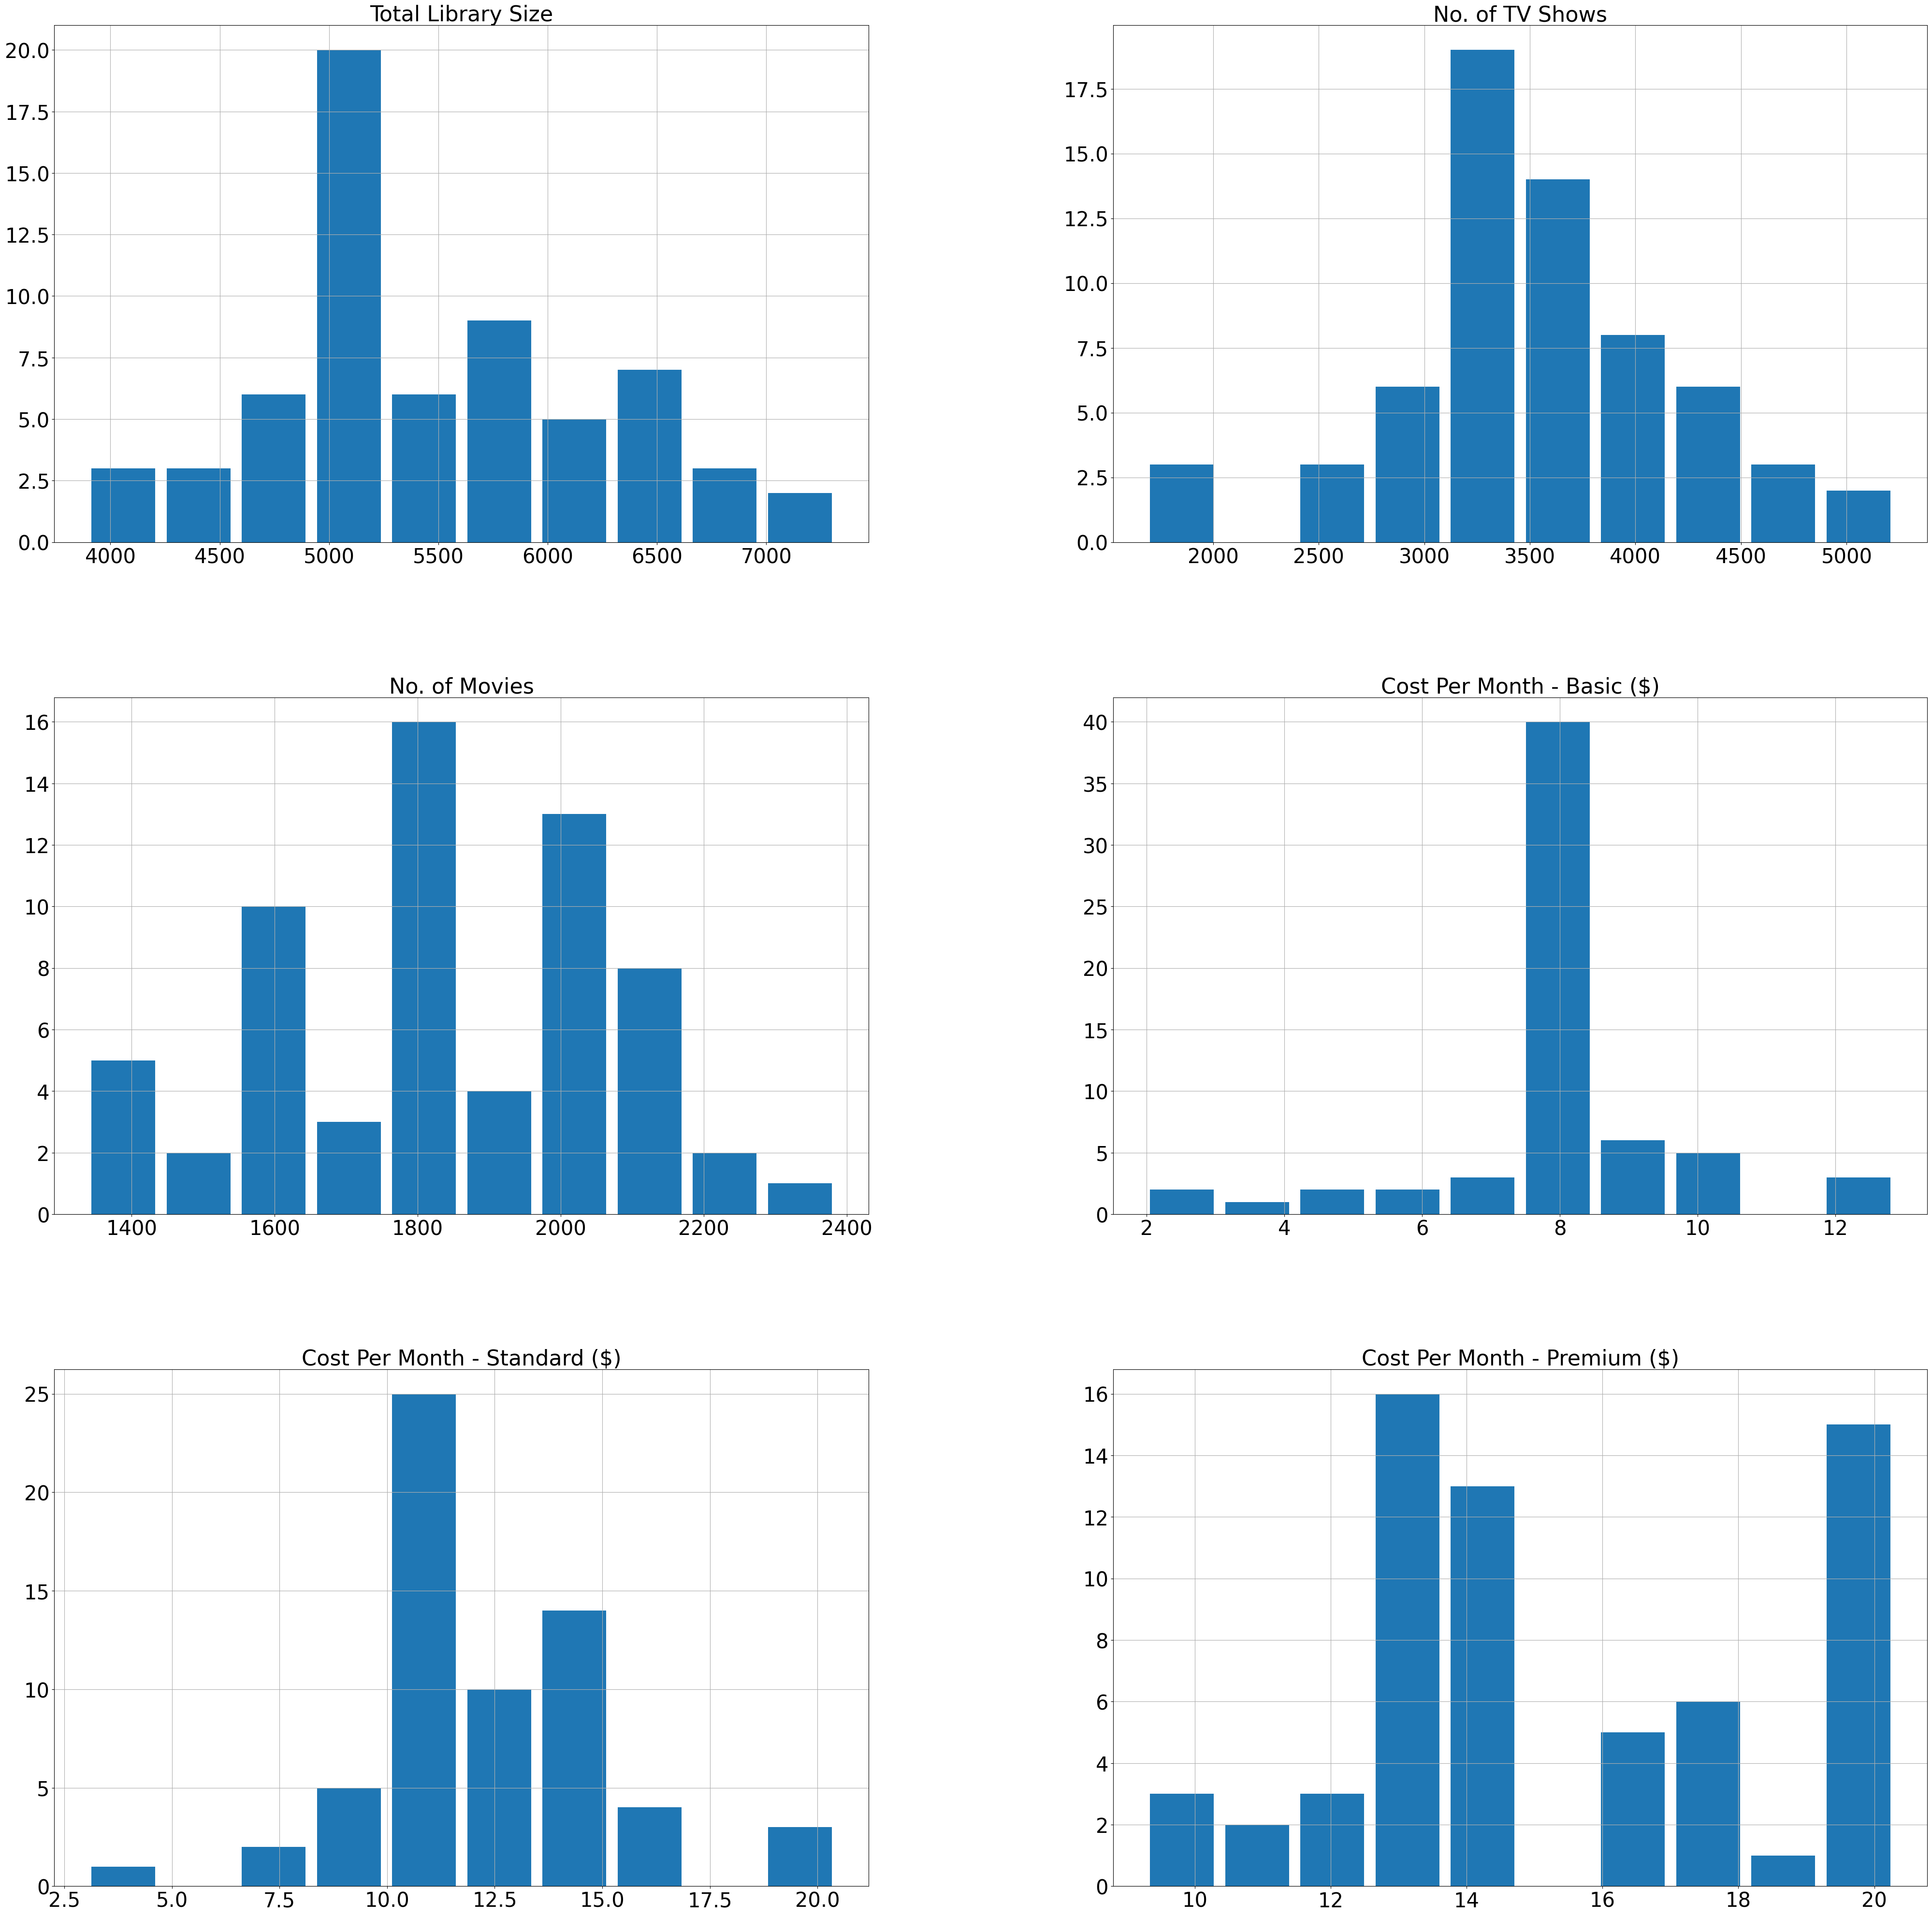

In [29]:
histogram = df.hist(figsize=(50,50), xlabelsize=30, ylabelsize=30, rwidth=0.85)
[x.title.set_size(32) for x in histogram.ravel()]
histogram  ### No. of TV SHOWS (Normal)

In [30]:
# total_library_size ->>  not multimodal, the distribution of the variable is unimodal, right-skewed
#No_of_movies ->> multimodal
#cost_per_month_basic ->> not multimodal, the distribution of the variable is unimodal, 
#cost_per_month_standard ->> not multimodal, the distribution of the variable is unimodal, 
#cost_per_month_premium ->> multimodal, divergent

### TRANSFORMATIONS

ShapiroResult(statistic=0.9745875597000122, pvalue=0.20865309238433838)


<AxesSubplot: >

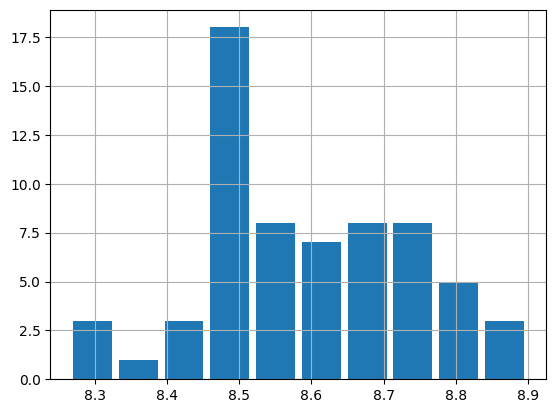

In [31]:
trans_total_library_size = np.log(total_library_size)
print(st.shapiro(trans_total_library_size))
### normal distribution
total_library_size = trans_total_library_size
total_library_size.hist(rwidth=0.85)

In [32]:
print(total_library_size)

0     8.468003
1     8.718337
2     8.637639
3     8.515191
4     8.515392
        ...   
59    8.442254
60    8.582232
61    8.801319
62    8.668712
63    8.514991
Name: Total Library Size, Length: 64, dtype: float64


In [33]:
df_transformed = pd.read_excel('netflix_transformated.xlsx')

In [34]:
df_transformed["Total Library Size"] = total_library_size
df_transformed.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,8.468003,3154,1606,3.74,14.67,9.26
1,Australia,8.718337,4050,2064,7.84,15.24,16.39
2,Austria,8.637639,3779,1861,7.84,14.67,20.32
3,Belgium,8.515191,3374,1616,10.16,15.24,20.32
4,Bolivia,8.515392,3155,1836,7.99,10.99,13.99


# Macierze korelacji


In [35]:
corrM = df_transformed.corr()
corrM

C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\874386416.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df_transformed.corr()


,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.000000,0.822009,0.721419,0.060734,0.141813,0.120875
No. of TV Shows,0.822009,1.000000,0.572496,-0.054836,-0.013968,0.141693
No. of Movies,0.721419,0.572496,1.000000,-0.121698,-0.118412,-0.063773
Cost Per Month - Basic ($),0.060734,-0.054836,-0.121698,1.000000,0.647136,0.262304
Cost Per Month - Standard ($),0.141813,-0.013968,-0.118412,0.647136,1.000000,0.361693
Cost Per Month - Premium ($),0.120875,0.141693,-0.063773,0.262304,0.361693,1.000000


In [37]:
corrM.style.background_gradient(cmap ='coolwarm')

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.000000,0.822009,0.721419,0.060734,0.141813,0.120875
No. of TV Shows,0.822009,1.000000,0.572496,-0.054836,-0.013968,0.141693
No. of Movies,0.721419,0.572496,1.000000,-0.121698,-0.118412,-0.063773
Cost Per Month - Basic ($),0.060734,-0.054836,-0.121698,1.000000,0.647136,0.262304
Cost Per Month - Standard ($),0.141813,-0.013968,-0.118412,0.647136,1.000000,0.361693
Cost Per Month - Premium ($),0.120875,0.141693,-0.063773,0.262304,0.361693,1.000000


<AxesSubplot: >

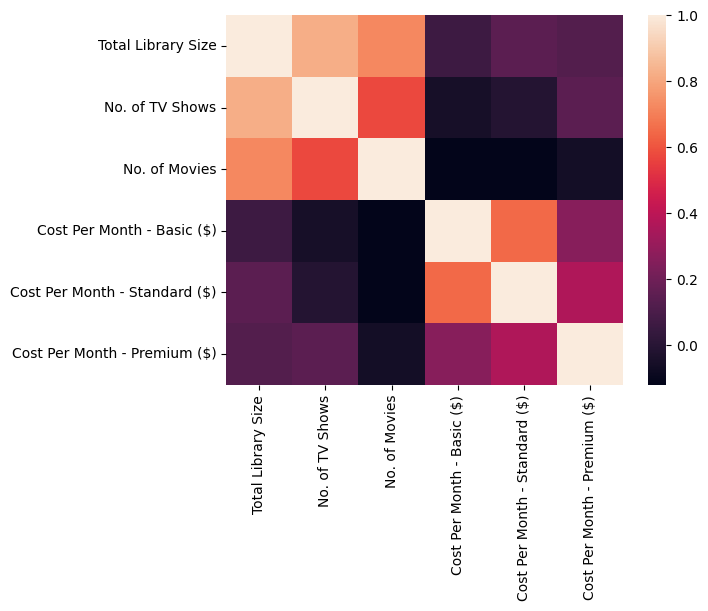

In [38]:
sn.heatmap(corrM, annot = False)

# Correlation charts

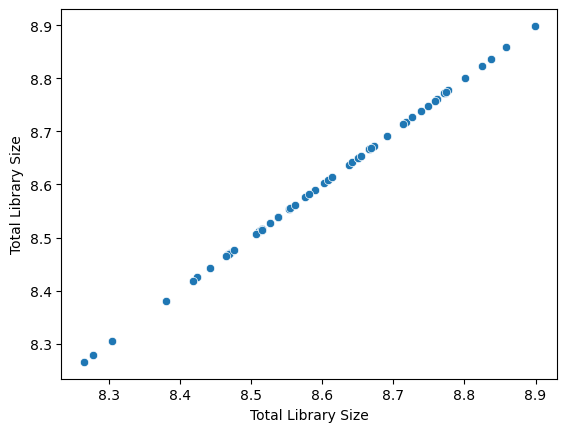

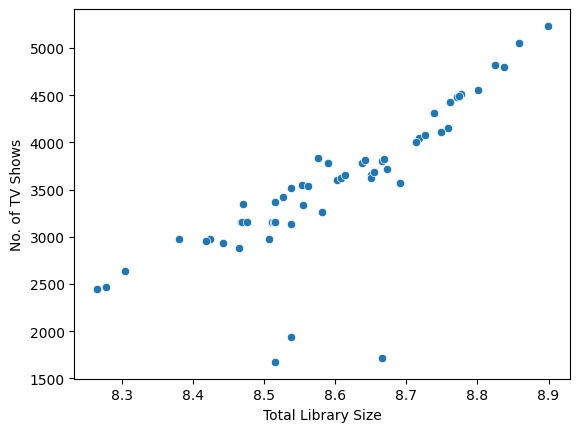

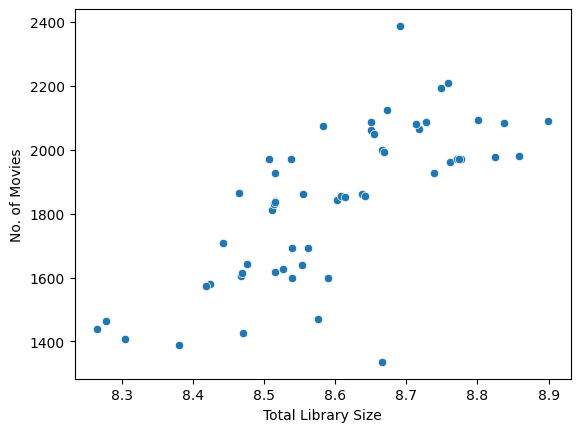

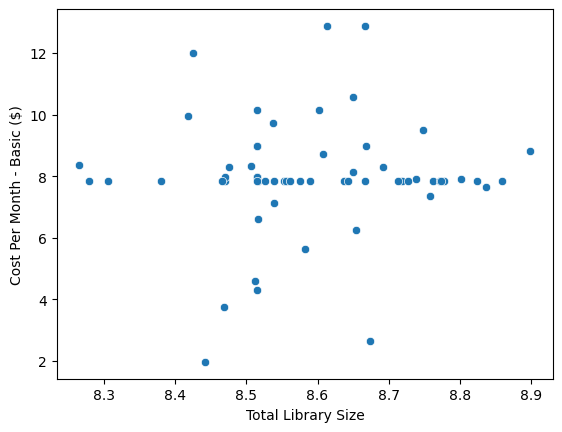

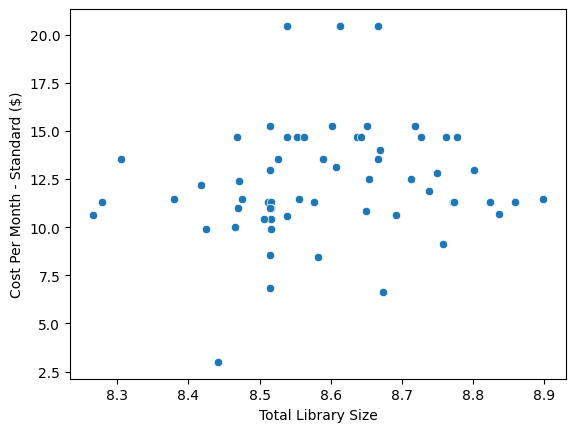

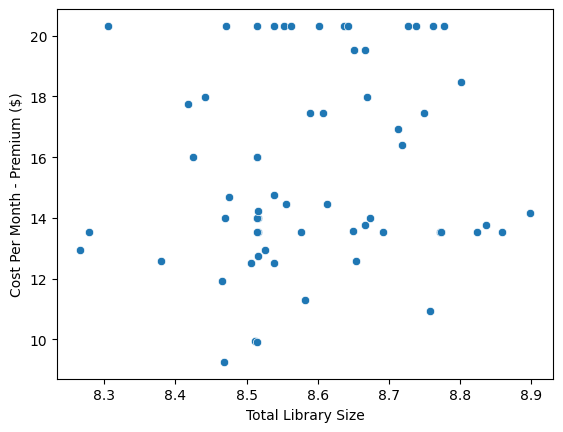

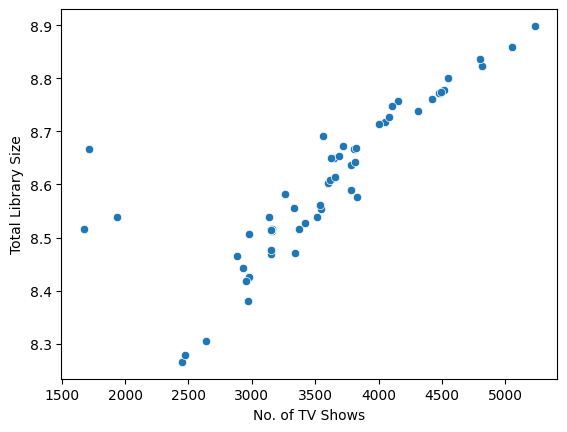

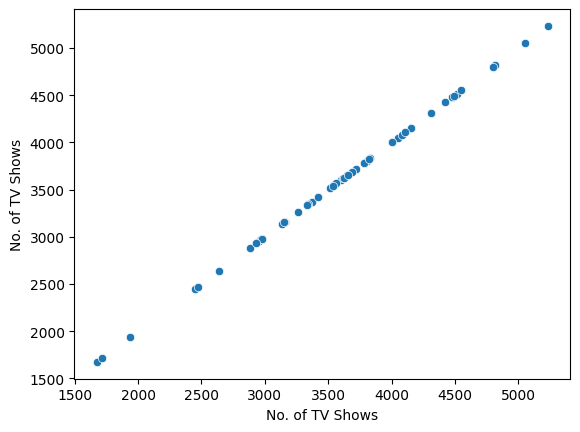

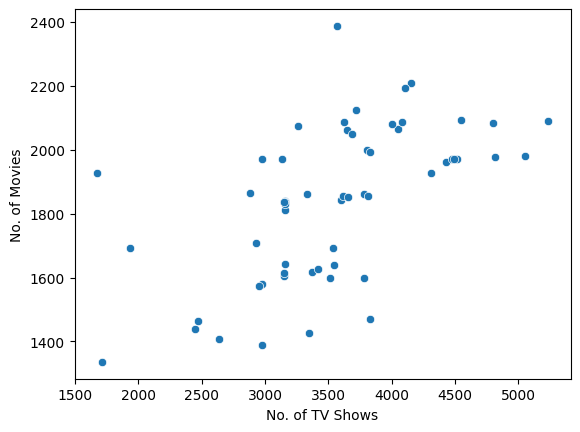

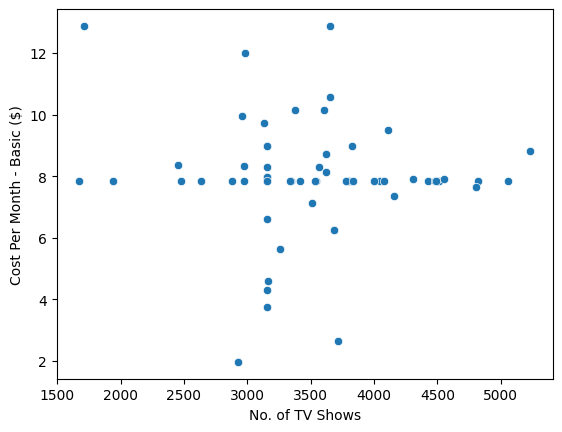

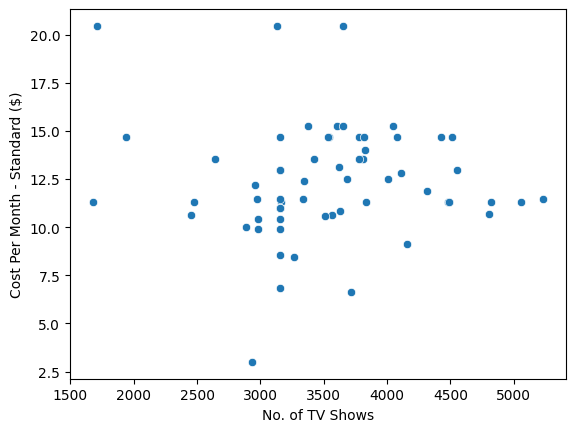

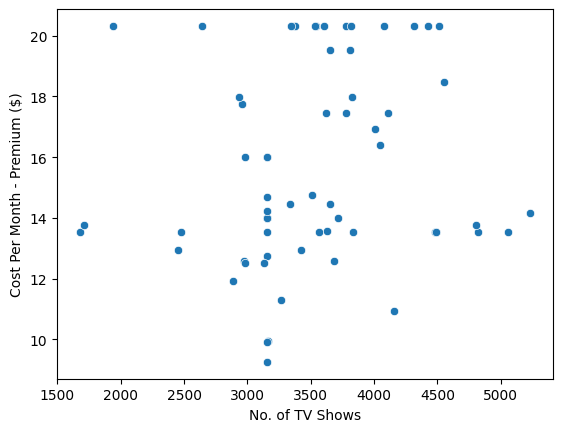

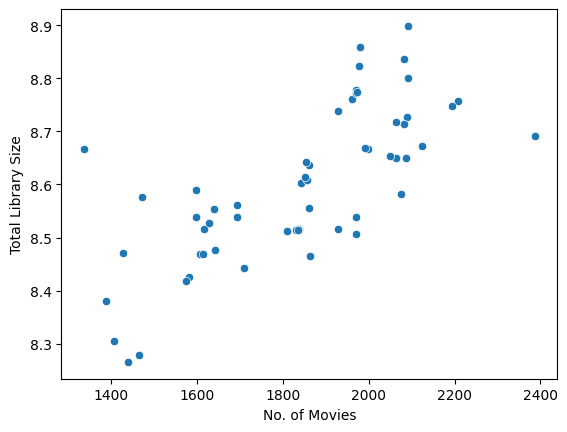

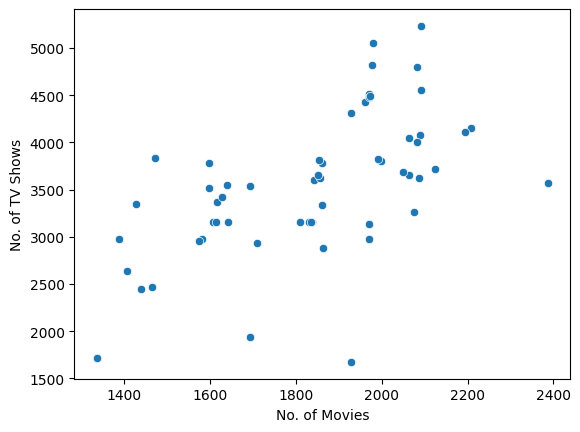

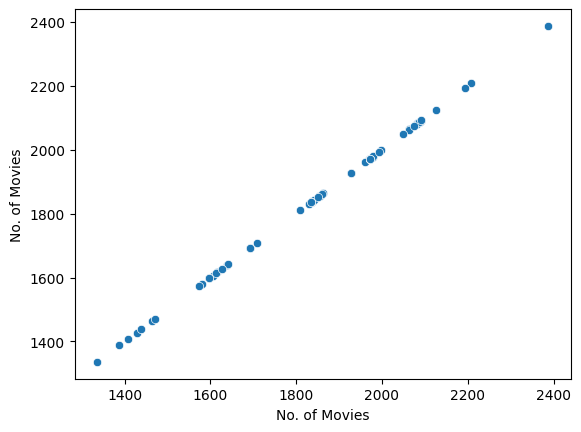

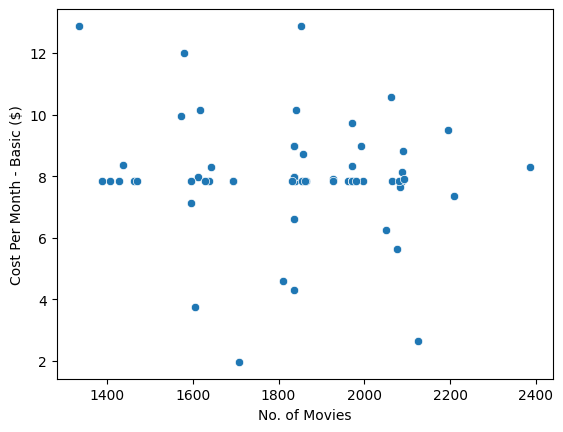

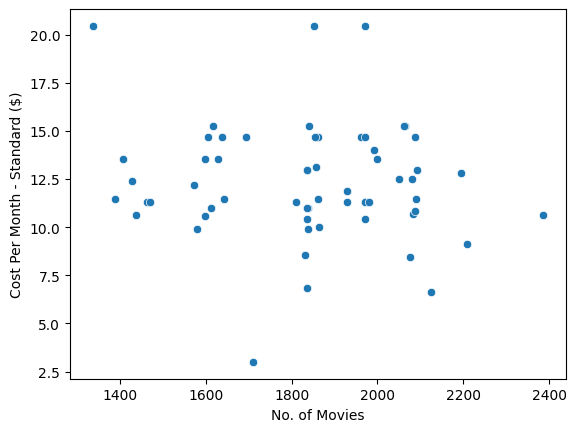

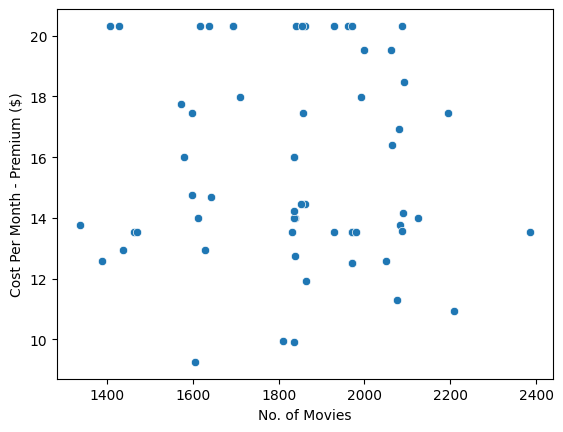

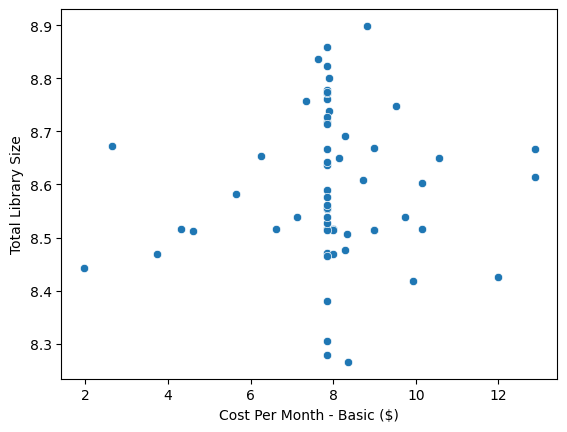

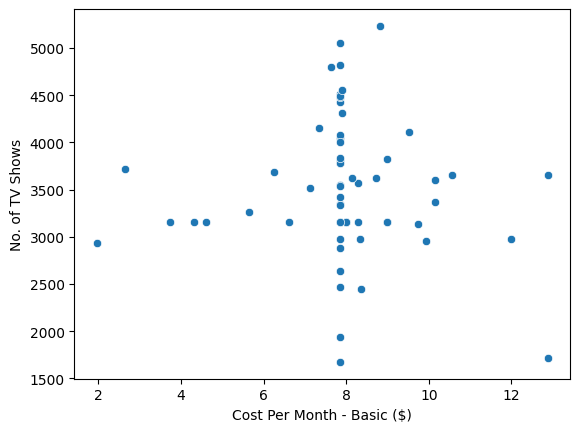

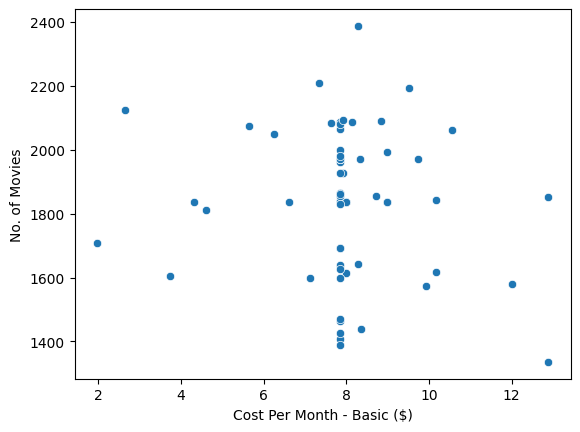

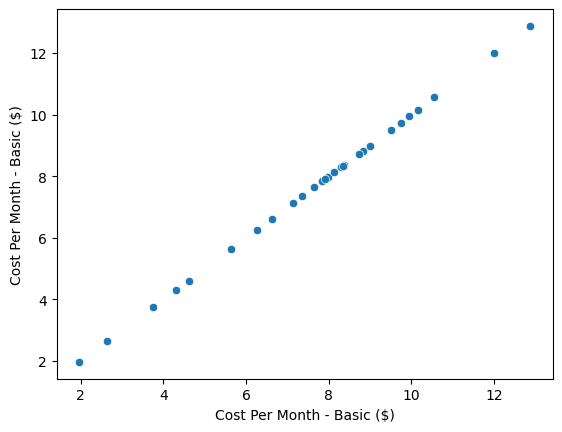

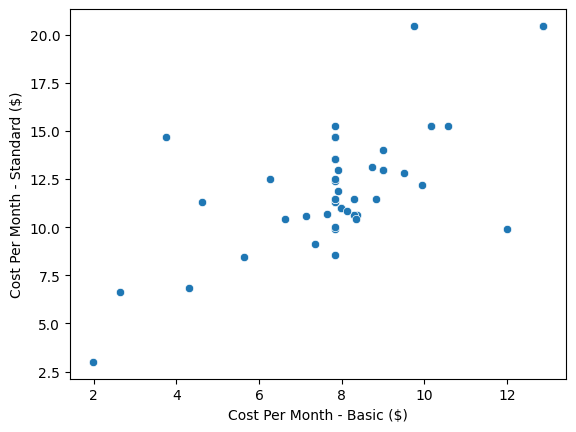

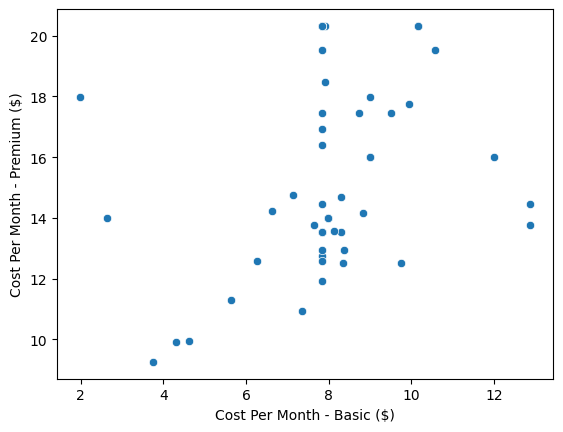

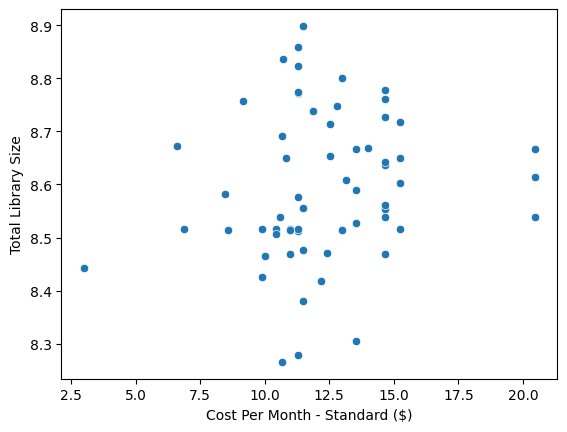

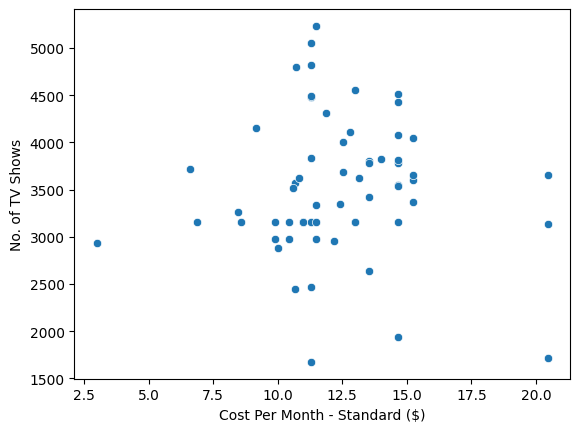

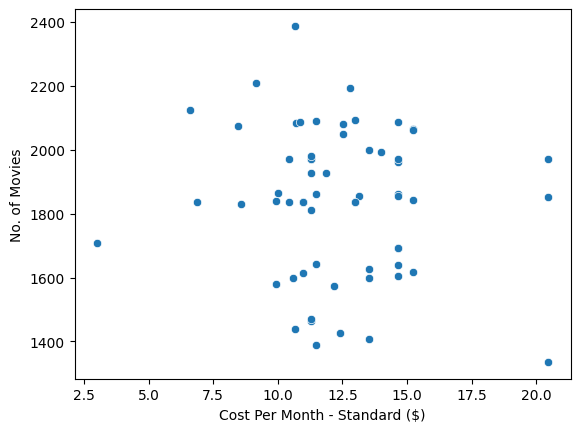

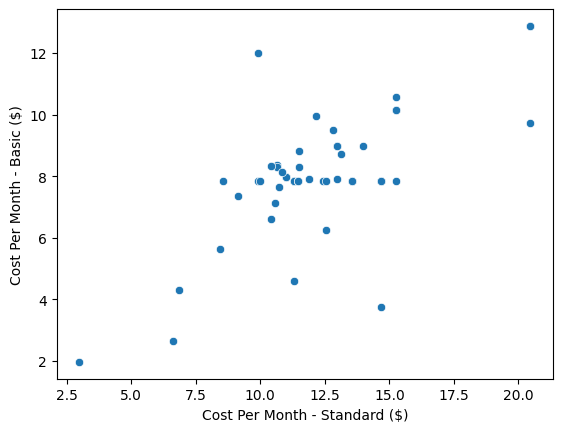

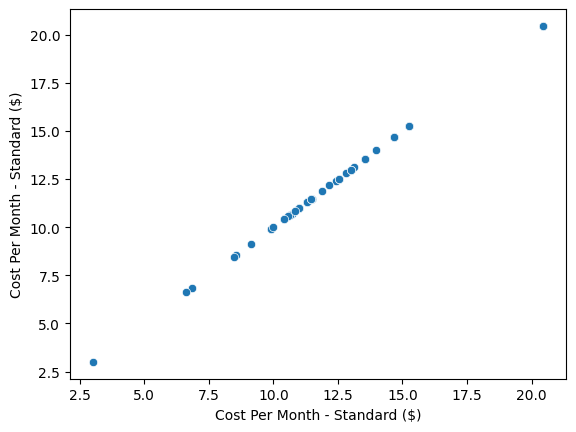

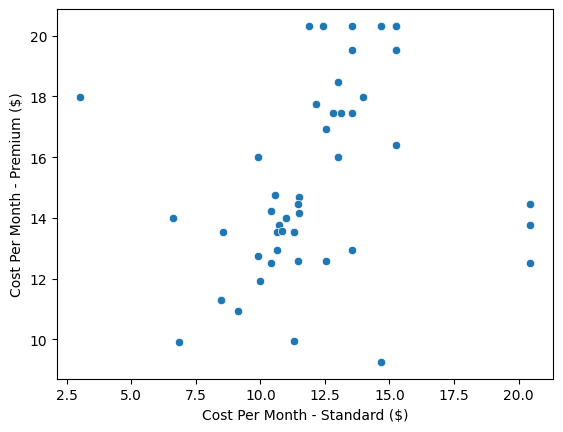

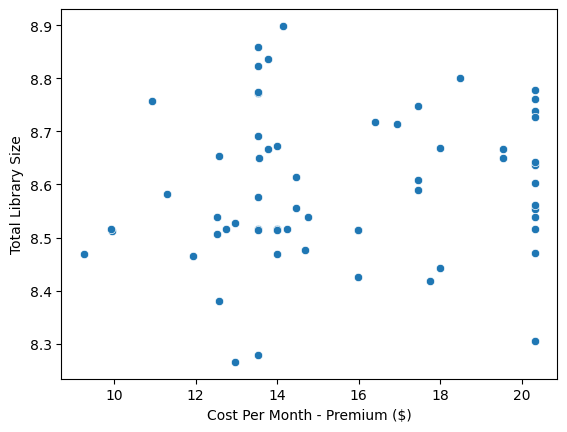

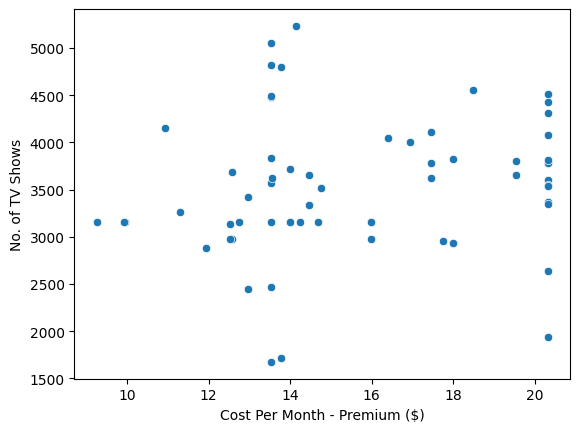

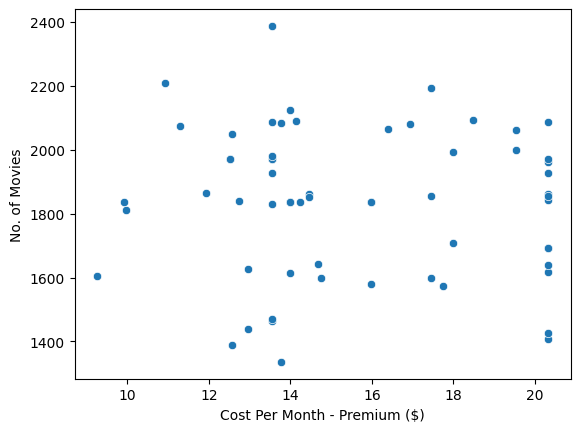

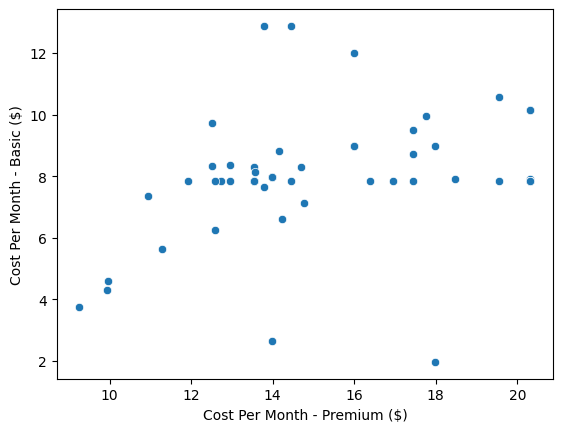

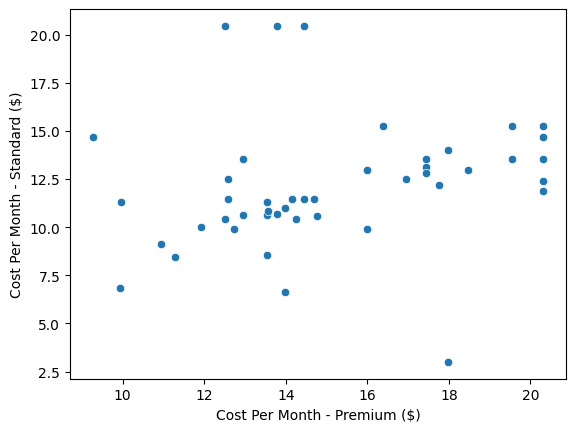

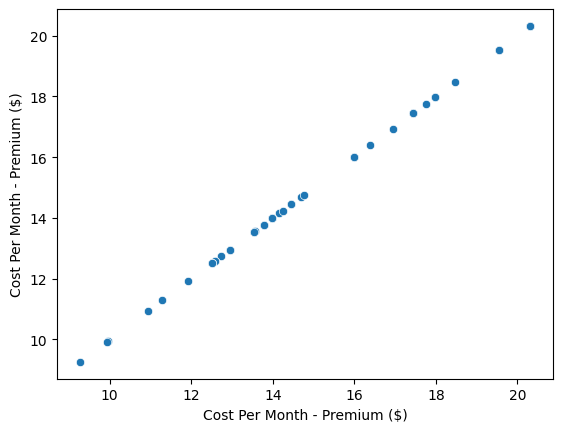

In [39]:
for i in df_transformed.columns[1:]:
    for j in df_transformed.iloc[:,1:]:
        sn.scatterplot(x=df_transformed[i], y=df_transformed[j])
        plt.show()

In [40]:
df_transformed.head(100)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,8.468003,3154,1606,3.74,14.67,9.26
1,Australia,8.718337,4050,2064,7.84,15.24,16.39
2,Austria,8.637639,3779,1861,7.84,14.67,20.32
3,Belgium,8.515191,3374,1616,10.16,15.24,20.32
4,Bolivia,8.515392,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...
59,Turkey,8.442254,2930,1709,1.97,3.00,17.99
60,Ukraine,8.582232,3261,2075,5.64,8.46,11.29
61,United Kingdom,8.801319,4551,2092,7.91,12.99,18.48
62,United States,8.668712,3826,1992,8.99,13.99,17.99


In [41]:
mean_total_library_size = total_library_size.mean()
mean_No_of_TV_Shows = No_of_TV_Shows.mean()
mean_No_of_movies = No_of_movies.mean()
mean_cost_per_month_basic = cost_per_month_basic.mean()
mean_cost_per_month_standard = cost_per_month_standard.mean()
mean_cost_per_month_premium = cost_per_month_premium.mean()

In [42]:
std_total_library_size = total_library_size.std()
std_No_of_TV_Shows = No_of_TV_Shows.std()
std_No_of_movies = No_of_movies.std()
std_cost_per_month_basic = cost_per_month_basic.std()
std_cost_per_month_standard = cost_per_month_standard.std()
std_cost_per_month_premium = cost_per_month_premium.std()

In [43]:
scaled_total_library_size = total_library_size - mean_total_library_size / std_total_library_size
scaled_No_of_TV_Shows = No_of_TV_Shows -mean_No_of_TV_Shows /std_No_of_TV_Shows
scaled_No_of_movies = No_of_movies -mean_No_of_movies/std_No_of_movies
scaled_cost_per_month_basic = cost_per_month_basic -mean_cost_per_month_basic/std_cost_per_month_basic
scaled_cost_per_month_standard = cost_per_month_standard -mean_cost_per_month_standard/std_cost_per_month_standard
scaled_cost_per_month_premium = cost_per_month_premium -mean_cost_per_month_premium/std_cost_per_month_premium

In [44]:
df_transformed['Total Library Size'] = scaled_total_library_size
df_transformed['No. of TV Shows'] = scaled_No_of_TV_Shows
df_transformed['No. of Movies'] = scaled_No_of_movies
df_transformed['Cost Per Month - Basic ($)'] = scaled_cost_per_month_basic
df_transformed['Cost Per Month - Standard ($)'] = scaled_cost_per_month_standard
df_transformed['Cost Per Month - Premium ($)'] = scaled_cost_per_month_premium

In [45]:
df_transformed.head(5)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,-52.805563,3149.153456,1597.942346,-0.575788,10.465848,4.420828
1,Australia,-52.555230,4045.153456,2055.942346,3.524212,11.035848,11.550828
2,Austria,-52.635927,3774.153456,1852.942346,3.524212,10.465848,15.480828
3,Belgium,-52.758375,3369.153456,1607.942346,5.844212,11.035848,15.480828
4,Bolivia,-52.758175,3150.153456,1827.942346,3.674212,6.785848,9.150828


In [46]:
rows = df_transformed.iloc[:,0]


# MATRIX EUCLIDEAN DISTANCES (OF OBJECTS)

In [47]:
matrix_distance = pd.DataFrame(columns=rows,index=rows)
matrix_distance

Country,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Canada,Chile,Colombia,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,Ukraine,United Kingdom,United States,Uruguay
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
def bare_numpy(v, u):
   return np.sqrt(np.sum((v - u) ** 2))


In [49]:
dict_of_object = {}
for i in range(len(rows)):
    dict_of_object[rows[i]] = np.array([df_transformed.iloc[i,1:]])
    

In [50]:
for country in dict_of_object: 
    for country1 in dict_of_object:
        value = bare_numpy(dict_of_object[country], dict_of_object[country1])
        matrix_distance.loc[country,country1] = value


    

In [51]:
matrix_distance.head(100)


Country,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Canada,Chile,Colombia,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,Ukraine,United Kingdom,United States,Uruguay
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,1006.304146,675.121591,220.598883,230.119491,204.187838,1706.064383,1201.033149,232.119754,229.143562,...,391.959363,283.413267,557.368837,365.657157,405.713898,246.982865,481.099063,1479.158656,775.038243,229.165181
Australia,1006.304146,0.0,338.623355,810.987588,923.597795,923.648972,773.809238,294.353201,922.146286,922.930906,...,633.918602,1271.587135,449.23983,920.733875,1077.040579,1174.99443,789.125362,501.791234,235.298635,924.804621
Austria,675.121591,338.623355,0.0,473.345246,624.543552,619.208529,1046.587993,536.209712,623.488676,623.687762,...,295.42005,934.577559,125.695597,654.387488,809.557339,862.601364,560.575551,805.82333,139.202065,625.558877
Belgium,220.598883,810.987588,473.345246,0.0,310.521884,287.634724,1489.676491,987.587702,311.28644,309.349962,...,179.384251,461.372432,366.285563,428.617855,532.654943,453.880301,472.861443,1269.61356,587.952705,310.461238
Bolivia,230.119491,923.597795,624.543552,310.521884,0.0,27.436387,1670.048026,1159.672755,2.784134,7.005919,...,407.01798,483.559985,499.370418,136.970452,223.409035,258.592509,261.488466,1419.287232,688.91438,3.316625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,246.982865,1174.99443,862.601364,453.880301,258.592509,253.308467,1908.089392,1398.299495,260.435737,258.915709,...,606.356404,324.076333,738.282765,332.648695,266.418293,0.0,493.563765,1665.672673,939.720763,257.30349
Ukraine,481.099063,789.125362,560.575551,472.861443,261.488466,282.907836,1561.022412,1060.286445,259.23551,261.975539,...,470.822626,744.935303,452.088934,164.643023,302.464361,493.563765,0.0,1290.142015,571.139826,262.874186
United Kingdom,1479.158656,501.791234,805.82333,1269.61356,1419.287232,1417.367791,291.285597,290.689945,1417.950465,1418.519553,...,1090.610962,1727.928616,928.60421,1422.190121,1578.657451,1665.672673,1290.142015,0.0,731.865715,1420.445511


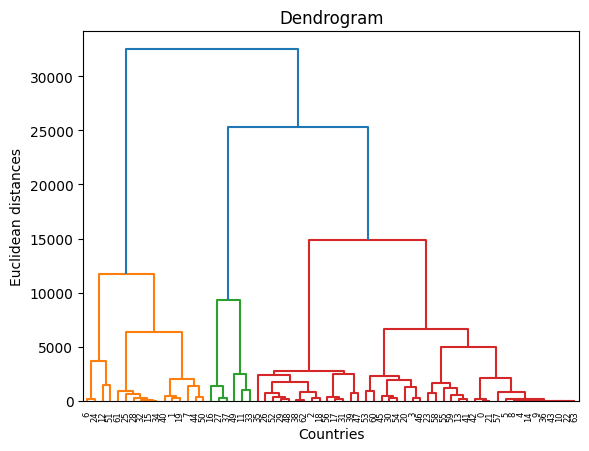

In [52]:
X = matrix_distance.iloc[:, 1:].values
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})



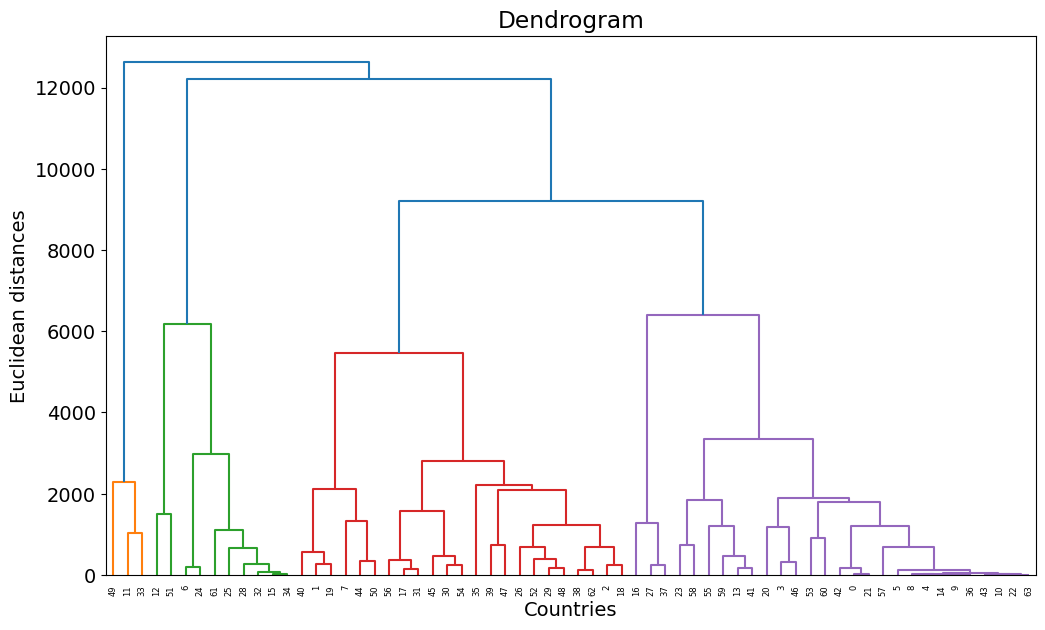

In [53]:
X = matrix_distance.iloc[:, 1:].values
dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})

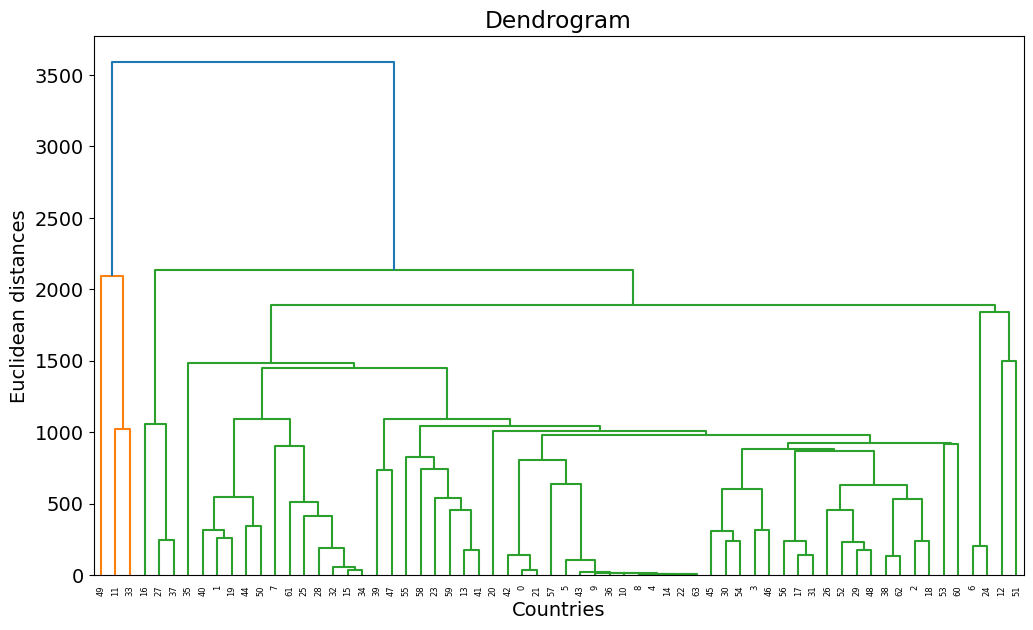

In [54]:
X = matrix_distance.iloc[:, 1:].values
dendrogram = sch.dendrogram(sch.linkage(X, method  = "single"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})

# MANHATTAN DISTANCE MATRIX (OF OBJECTS)

In [55]:
matrix_distance_manhattan = pd.DataFrame(columns=rows,index=rows)
matrix_distance_manhattan

Country,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Canada,Chile,Colombia,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,Ukraine,United Kingdom,United States,Uruguay
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
def manhattan(a, b):
    return np.sum(np.abs(val1-val2)for val1,val2 in zip(a,b))
        

In [57]:
dict_of_object = {}
for i in range(len(rows)):
    dict_of_object[rows[i]] = np.array([df_transformed.iloc[i,1:]])
print(dict_of_object)


{'Argentina': array([[-52.805563288077266, 3149.153455583186, 1597.9423464755828,
        -0.575788491907467, 10.465848315635707, 4.420827660538446]],
      dtype=object), 'Australia': array([[-52.55522973285195, 4045.153455583186, 2055.942346475583,
        3.5242115080925327, 11.035848315635707, 11.550827660538447]],
      dtype=object), 'Austria': array([[-52.63592689081062, 3774.153455583186, 1852.9423464755828,
        3.5242115080925327, 10.465848315635707, 15.480827660538447]],
      dtype=object), 'Belgium': array([[-52.75837504655716, 3369.153455583186, 1607.9423464755828,
        5.844211508092533, 11.035848315635707, 15.480827660538447]],
      dtype=object), 'Bolivia': array([[-52.758174665833124, 3150.153455583186, 1827.9423464755828,
        3.674211508092533, 6.7858483156357075, 9.150827660538447]],
      dtype=object), 'Brazil': array([[-52.76198878267213, 3157.153455583186, 1801.9423464755828,
        0.29421150809253316, 7.085848315635706, 5.120827660538447]],
      d

In [58]:
for country in dict_of_object: 
    for country1 in dict_of_object:
        value = np.sum(manhattan(dict_of_object[country], dict_of_object[country1]))
        matrix_distance_manhattan.loc[country,country1] = value


    

C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\53003951.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(np.abs(val1-val2)for val1,val2 in zip(a,b))


In [59]:
matrix_distance_manhattan.head(100)

Country,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Canada,Chile,Colombia,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,Ukraine,United Kingdom,United States,Uruguay
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,1366.050334,895.329636,248.097188,243.707389,216.993575,2049.116234,1497.300572,246.38799,240.097389,...,484.253972,409.707546,766.265591,400.119973,554.138736,349.195749,586.254229,1898.403316,1072.860709,242.706988
Australia,1366.050334,0.0,478.580697,1130.453145,1130.002945,1155.816759,861.9059,404.390239,1129.182344,1141.572945,...,889.656361,1760.91788,620.304743,1020.170361,1175.391598,1494.986082,814.216105,533.492982,300.049625,1129.003346
Austria,895.329636,478.580697,0.0,653.012448,659.282248,685.096062,1167.346597,601.970936,658.461647,670.852248,...,411.075664,1290.197183,150.724046,770.589664,924.670901,1021.065385,749.495408,1006.75368,182.191072,658.282649
Belgium,248.097188,1130.453145,653.012448,0.0,451.7502,425.863614,1820.359045,1254.843384,455.230801,461.6202,...,241.936784,642.964735,529.908402,608.462785,766.438452,559.832937,592.39704,1659.626128,832.903521,446.7502
Bolivia,243.707389,1130.002945,659.282248,451.7502,0.0,40.713814,1807.208845,1255.513184,5.480601,13.87,...,534.206584,632.174935,529.918202,168.712584,315.388653,370.083137,352.64684,1658.855927,835.15332,7.000401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,349.195749,1494.986082,1021.065385,559.832937,370.083137,352.029323,2176.991983,1617.436321,373.103738,366.333137,...,641.989721,383.811797,899.08134,496.795722,328.334485,0.0,712.969977,2020.779065,1197.236458,369.082737
Ukraine,586.254229,814.216105,749.495408,592.39704,352.64684,369.260654,1662.522005,1211.866344,347.166239,349.35684,...,674.460256,981.701775,638.431362,248.374256,393.975493,712.969977,0.0,1321.209087,663.66648,359.647241
United Kingdom,1898.403316,533.492982,1006.75368,1659.626128,1658.855927,1684.809741,388.732918,407.022744,1658.175326,1670.565927,...,1417.829344,2289.910862,1153.657725,1553.523343,1704.24458,2020.779065,1321.209087,0.0,827.702607,1657.856328


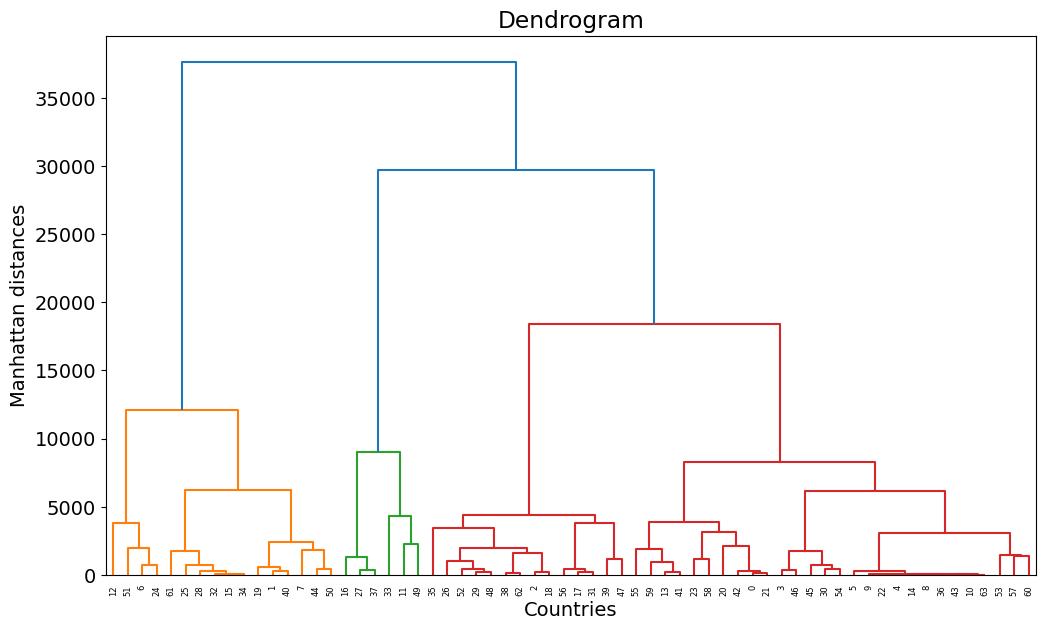

In [60]:
X = matrix_distance_manhattan.iloc[:, 1:].values
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Manhattan distances')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})

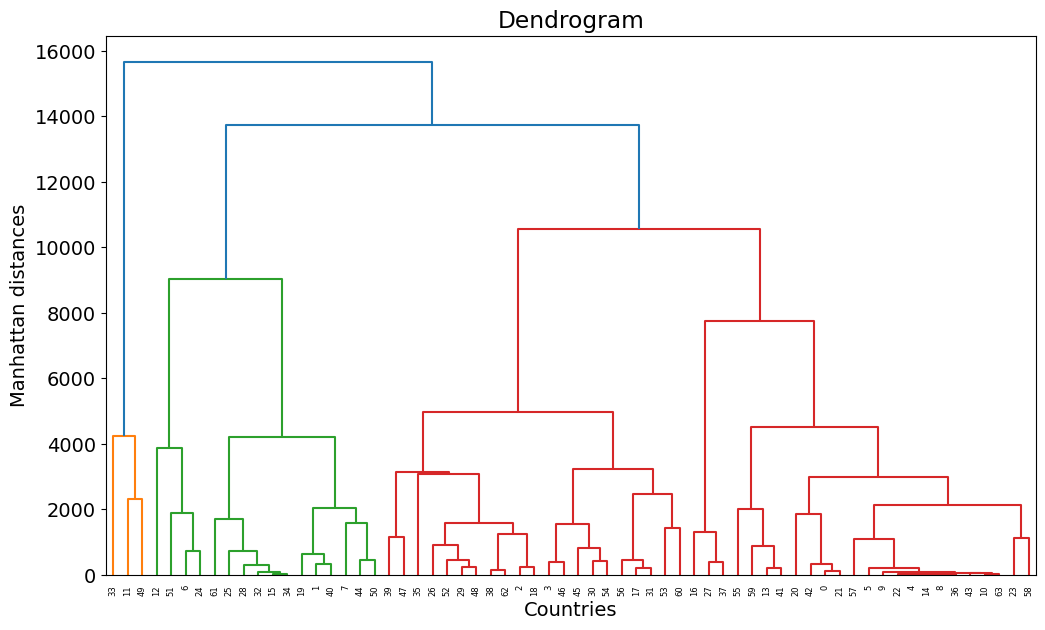

In [61]:
X = matrix_distance_manhattan.iloc[:, 1:].values
dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Manhattan distances')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})

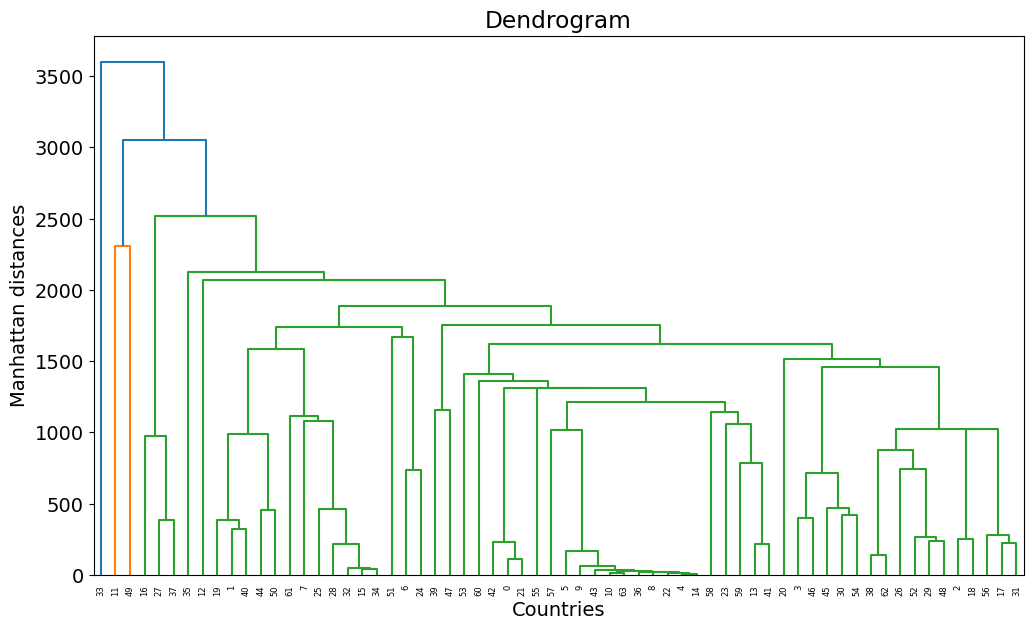

In [62]:
X = matrix_distance_manhattan.iloc[:, 1:].values
dendrogram = sch.dendrogram(sch.linkage(X, method  = "single"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Manhattan distances')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})

#  CHEBYSHEV DISTANCE MATRIX (OF OBJECTS)

In [63]:
matrix_distance_czebyszew = pd.DataFrame(columns=rows,index=rows)
matrix_distance_czebyszew

Country,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Canada,Chile,Colombia,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,Ukraine,United Kingdom,United States,Uruguay
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
def czebyszew(a, b):
    return max(np.sum(np.abs(val1-val2)for val1,val2 in zip(a,b)))
        

In [65]:
dict_of_object = {}
for i in range(len(rows)):
    dict_of_object[rows[i]] = np.array([df_transformed.iloc[i,1:]])
print(dict_of_object)


{'Argentina': array([[-52.805563288077266, 3149.153455583186, 1597.9423464755828,
        -0.575788491907467, 10.465848315635707, 4.420827660538446]],
      dtype=object), 'Australia': array([[-52.55522973285195, 4045.153455583186, 2055.942346475583,
        3.5242115080925327, 11.035848315635707, 11.550827660538447]],
      dtype=object), 'Austria': array([[-52.63592689081062, 3774.153455583186, 1852.9423464755828,
        3.5242115080925327, 10.465848315635707, 15.480827660538447]],
      dtype=object), 'Belgium': array([[-52.75837504655716, 3369.153455583186, 1607.9423464755828,
        5.844211508092533, 11.035848315635707, 15.480827660538447]],
      dtype=object), 'Bolivia': array([[-52.758174665833124, 3150.153455583186, 1827.9423464755828,
        3.674211508092533, 6.7858483156357075, 9.150827660538447]],
      dtype=object), 'Brazil': array([[-52.76198878267213, 3157.153455583186, 1801.9423464755828,
        0.29421150809253316, 7.085848315635706, 5.120827660538447]],
      d

In [66]:
for country in dict_of_object: 
    for country1 in dict_of_object:
        value = np.sum(czebyszew(dict_of_object[country], dict_of_object[country1]))
        matrix_distance_czebyszew.loc[country,country1] = value


    

C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\4221020287.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return max(np.sum(np.abs(val1-val2)for val1,val2 in zip(a,b)))


In [67]:
matrix_distance_czebyszew.head(100)

Country,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Canada,Chile,Colombia,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,Ukraine,United Kingdom,United States,Uruguay
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,896.0,625.0,220.0,230.0,204.0,1665.0,1157.0,232.0,229.0,...,382.0,218.0,500.0,365.0,365.0,224.0,469.0,1397.0,672.0,229.0
Australia,896.0,0.0,271.0,676.0,895.0,888.0,769.0,261.0,894.0,894.0,...,514.0,1077.0,396.0,916.0,1073.0,1120.0,789.0,501.0,224.0,896.0
Austria,625.0,271.0,0.0,405.0,624.0,617.0,1040.0,532.0,623.0,623.0,...,243.0,806.0,125.0,645.0,802.0,849.0,518.0,772.0,131.0,625.0
Belgium,220.0,676.0,405.0,0.0,220.0,212.0,1445.0,937.0,222.0,219.0,...,162.0,401.0,280.0,355.0,397.0,444.0,459.0,1177.0,452.0,220.0
Bolivia,230.0,895.0,624.0,220.0,0.0,26.0,1664.0,1156.0,2.0,4.13,...,381.0,448.0,499.0,135.0,178.0,225.0,239.0,1396.0,671.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,224.0,1120.0,849.0,444.0,225.0,232.0,1889.0,1381.0,226.0,226.0,...,606.0,321.0,724.0,262.0,262.0,0.0,366.0,1621.0,896.0,224.0
Ukraine,469.0,789.0,518.0,459.0,239.0,265.0,1558.0,1050.0,237.0,240.0,...,382.0,687.0,393.0,127.0,284.0,366.0,0.0,1290.0,565.0,240.0
United Kingdom,1397.0,501.0,772.0,1177.0,1396.0,1389.0,268.0,240.0,1395.0,1395.0,...,1015.0,1578.0,897.0,1417.0,1574.0,1621.0,1290.0,0.0,725.0,1397.0


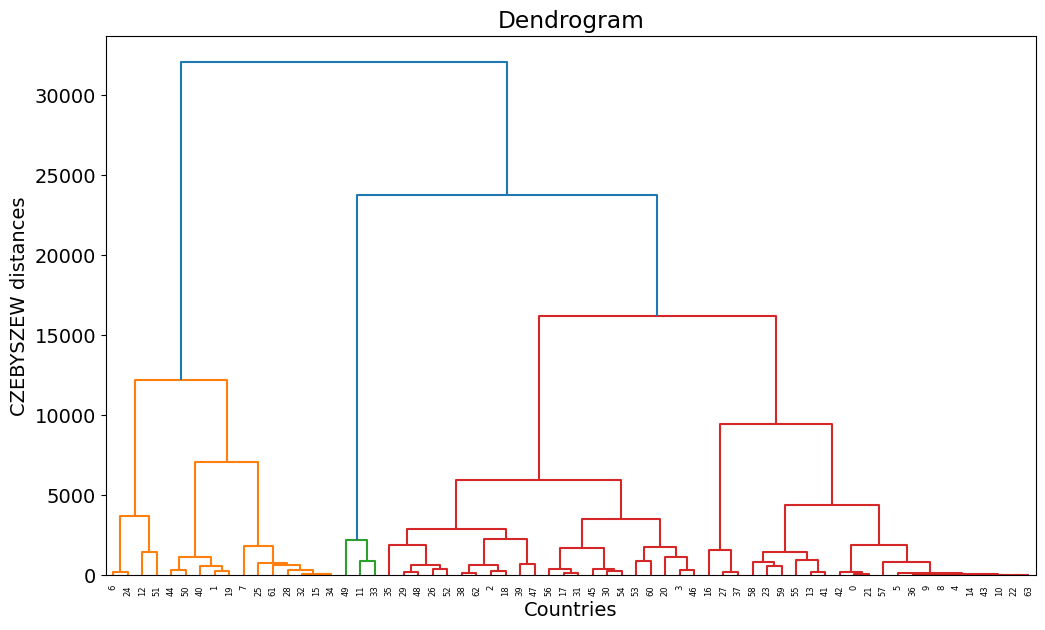

In [68]:
X = matrix_distance_czebyszew.iloc[:, 1:].values
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('CZEBYSZEW distances')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})

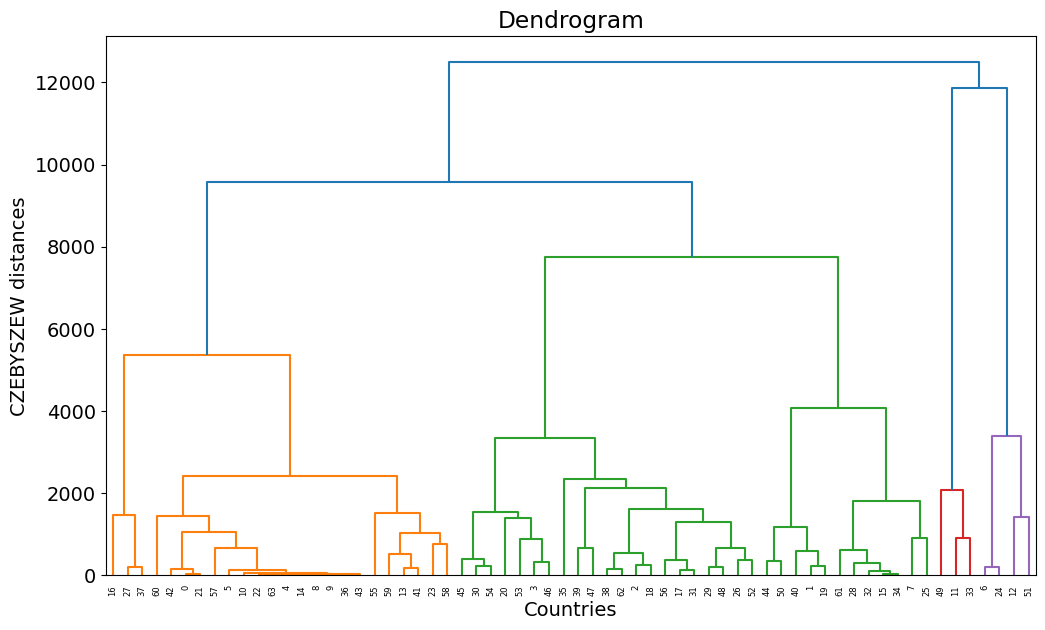

In [69]:
X = matrix_distance_czebyszew.iloc[:, 1:].values
dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('CZEBYSZEW distances')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})

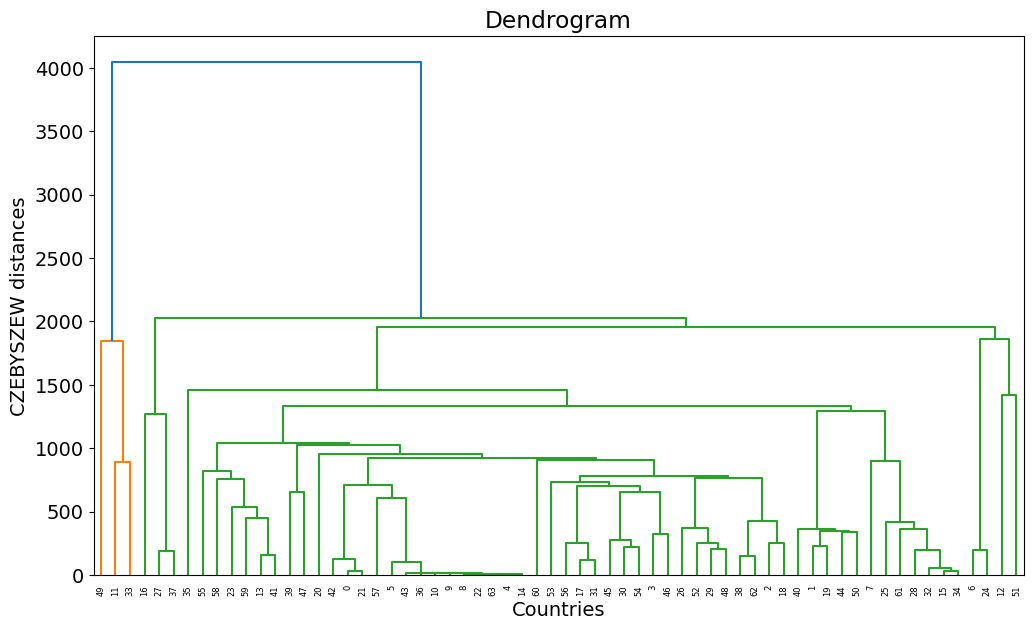

In [70]:
X = matrix_distance_czebyszew.iloc[:, 1:].values
dendrogram = sch.dendrogram(sch.linkage(X, method  = "single"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('CZEBYSZEW distances')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})

# COMPLEMENTARY DISTANCE

In [71]:
corrM

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.000000,0.822009,0.721419,0.060734,0.141813,0.120875
No. of TV Shows,0.822009,1.000000,0.572496,-0.054836,-0.013968,0.141693
No. of Movies,0.721419,0.572496,1.000000,-0.121698,-0.118412,-0.063773
Cost Per Month - Basic ($),0.060734,-0.054836,-0.121698,1.000000,0.647136,0.262304
Cost Per Month - Standard ($),0.141813,-0.013968,-0.118412,0.647136,1.000000,0.361693
Cost Per Month - Premium ($),0.120875,0.141693,-0.063773,0.262304,0.361693,1.000000


In [72]:
corrM_dis = abs(1 - corrM)
corrM_dis

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,0.000000,0.177991,0.278581,0.939266,0.858187,0.879125
No. of TV Shows,0.177991,0.000000,0.427504,1.054836,1.013968,0.858307
No. of Movies,0.278581,0.427504,0.000000,1.121698,1.118412,1.063773
Cost Per Month - Basic ($),0.939266,1.054836,1.121698,0.000000,0.352864,0.737696
Cost Per Month - Standard ($),0.858187,1.013968,1.118412,0.352864,0.000000,0.638307
Cost Per Month - Premium ($),0.879125,0.858307,1.063773,0.737696,0.638307,0.000000


C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\894417199.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))


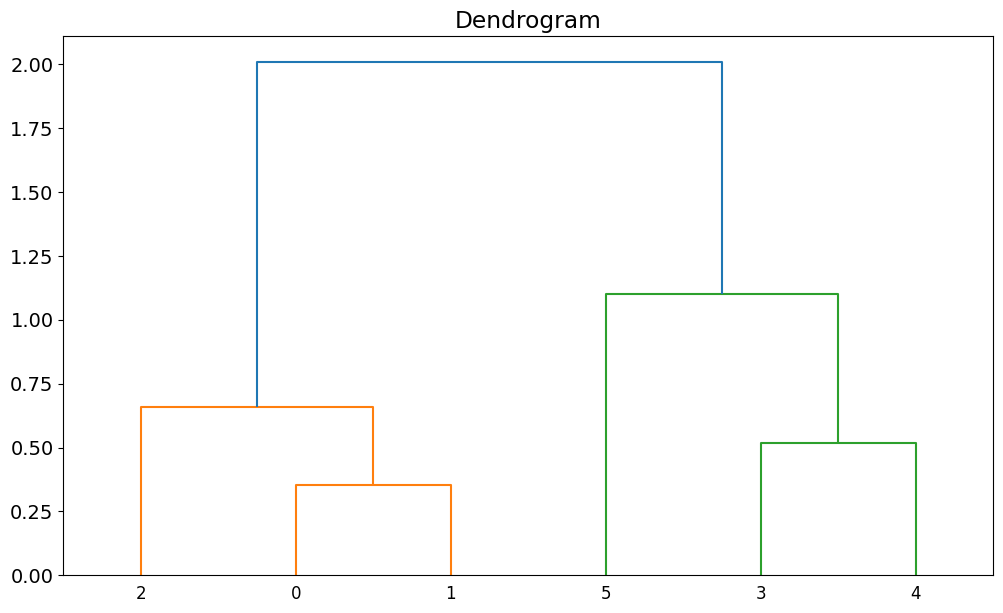

In [73]:
X = corrM_dis.iloc[:, :]
dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))
plt.title('Dendrogram')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({'font.size': 14})

# PCA

In [74]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from math import sqrt
import math
import scipy.stats as stats
import statistics as st
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [75]:
df_transformed.head(20)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,-52.805563,3149.153456,1597.942346,-0.575788,10.465848,4.420828
1,Australia,-52.555230,4045.153456,2055.942346,3.524212,11.035848,11.550828
2,Austria,-52.635927,3774.153456,1852.942346,3.524212,10.465848,15.480828
3,Belgium,-52.758375,3369.153456,1607.942346,5.844212,11.035848,15.480828
4,Bolivia,-52.758175,3150.153456,1827.942346,3.674212,6.785848,9.150828
5,Brazil,-52.761989,3157.153456,1801.942346,0.294212,7.085848,5.120828
6,Bulgaria,-52.449330,4814.153456,1969.942346,3.524212,7.085848,8.700828
7,Canada,-52.534991,4306.153456,1919.942346,3.594212,7.665848,15.480828
8,Chile,-52.757574,3151.153456,1829.942346,3.524212,5.705848,7.900828
9,Colombia,-52.758175,3151.153456,1826.942346,-0.005788,2.655848,5.090828


In [76]:
corrM = df_transformed.corr()
corrM


C:\Users\Michał\AppData\Local\Temp\ipykernel_16644\2202416873.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df_transformed.corr()


,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.000000,0.822009,0.721419,0.060734,0.141813,0.120875
No. of TV Shows,0.822009,1.000000,0.572496,-0.054836,-0.013968,0.141693
No. of Movies,0.721419,0.572496,1.000000,-0.121698,-0.118412,-0.063773
Cost Per Month - Basic ($),0.060734,-0.054836,-0.121698,1.000000,0.647136,0.262304
Cost Per Month - Standard ($),0.141813,-0.013968,-0.118412,0.647136,1.000000,0.361693
Cost Per Month - Premium ($),0.120875,0.141693,-0.063773,0.262304,0.361693,1.000000


In [77]:
pca = PCA(n_components=6)
pca_fit = pca.fit(df_transformed.iloc[:,1:])

PC_values = np.arange(pca.n_components_) + 1


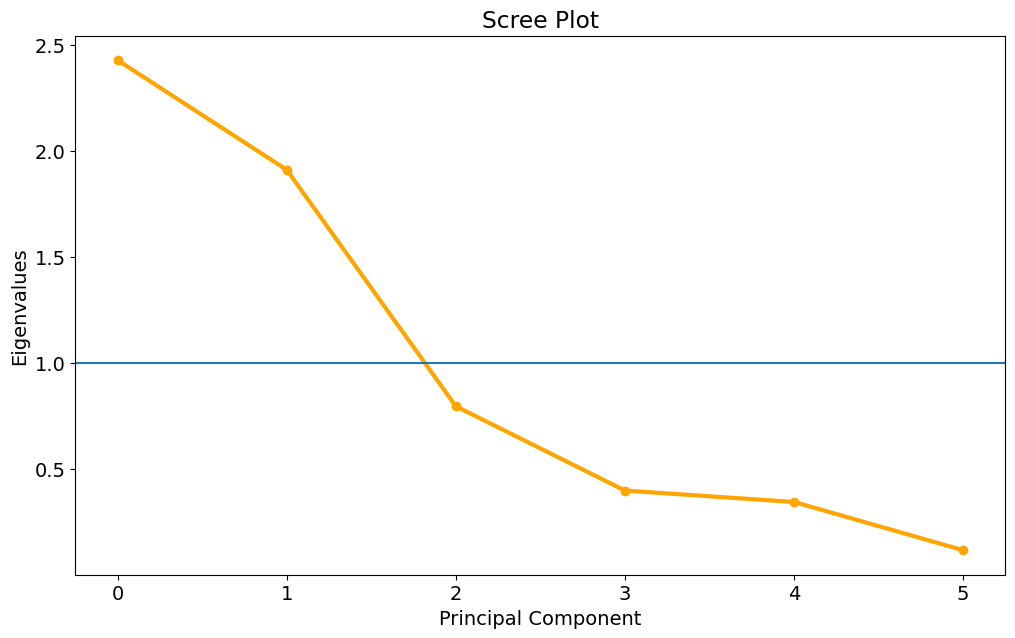

In [78]:
from numpy.linalg import eig


values, vectors = eig(corrM)

values[3], values[5] = values[5],values[3]
values[3],values[4] = values[4],values[3]
vectors[3], vectors[5] = vectors[5],vectors[3]
vectors[3],vectors[4] = vectors[4],vectors[3]
val = pd.DataFrame(values, columns=['w.wlasne']) 

plt.plot(val, 'o-', linewidth=3, color='orange')
plt.axhline(1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()


In [79]:
vectors

array([[ 0.61145433,  0.06500557,  0.08146205, -0.76981671,  0.12656499,
        -0.08139619],
       [ 0.57561318, -0.01430269, -0.12634006,  0.52268858,  0.59327967,
         0.16528452],
       [ 0.53460682, -0.1525417 ,  0.18304682,  0.31353979, -0.74618172,
        -0.04822933],
       [ 0.02780929,  0.6375985 ,  0.22965611,  0.18652667,  0.07000997,
        -0.70729009],
       [ 0.02780929,  0.6375985 ,  0.22965611,  0.18652667,  0.07000997,
        -0.70729009],
       [ 0.08976182,  0.44483643, -0.84798402, -0.03281292, -0.25459749,
         0.09534093]])

In [80]:
list_of_columns = []
for column in df_transformed.columns:
    list_of_columns.append(column)
zredukowana_macierz = pd.DataFrame(vectors[:2])
zredukowana_macierz_trans = zredukowana_macierz.transpose()
index = pd.Index(list_of_columns[1:])
zredukowana_macierz_trans = zredukowana_macierz_trans.set_index(index)
zredukowana_macierz_trans = zredukowana_macierz_trans.set_axis(['PC1', 'PC2'], axis=1)
zredukowana_macierz_trans

,PC1,PC2
Total Library Size,0.611454,0.575613
No. of TV Shows,0.065006,-0.014303
No. of Movies,0.081462,-0.126340
Cost Per Month - Basic ($),-0.769817,0.522689
Cost Per Month - Standard ($),0.126565,0.593280
Cost Per Month - Premium ($),-0.081396,0.165285


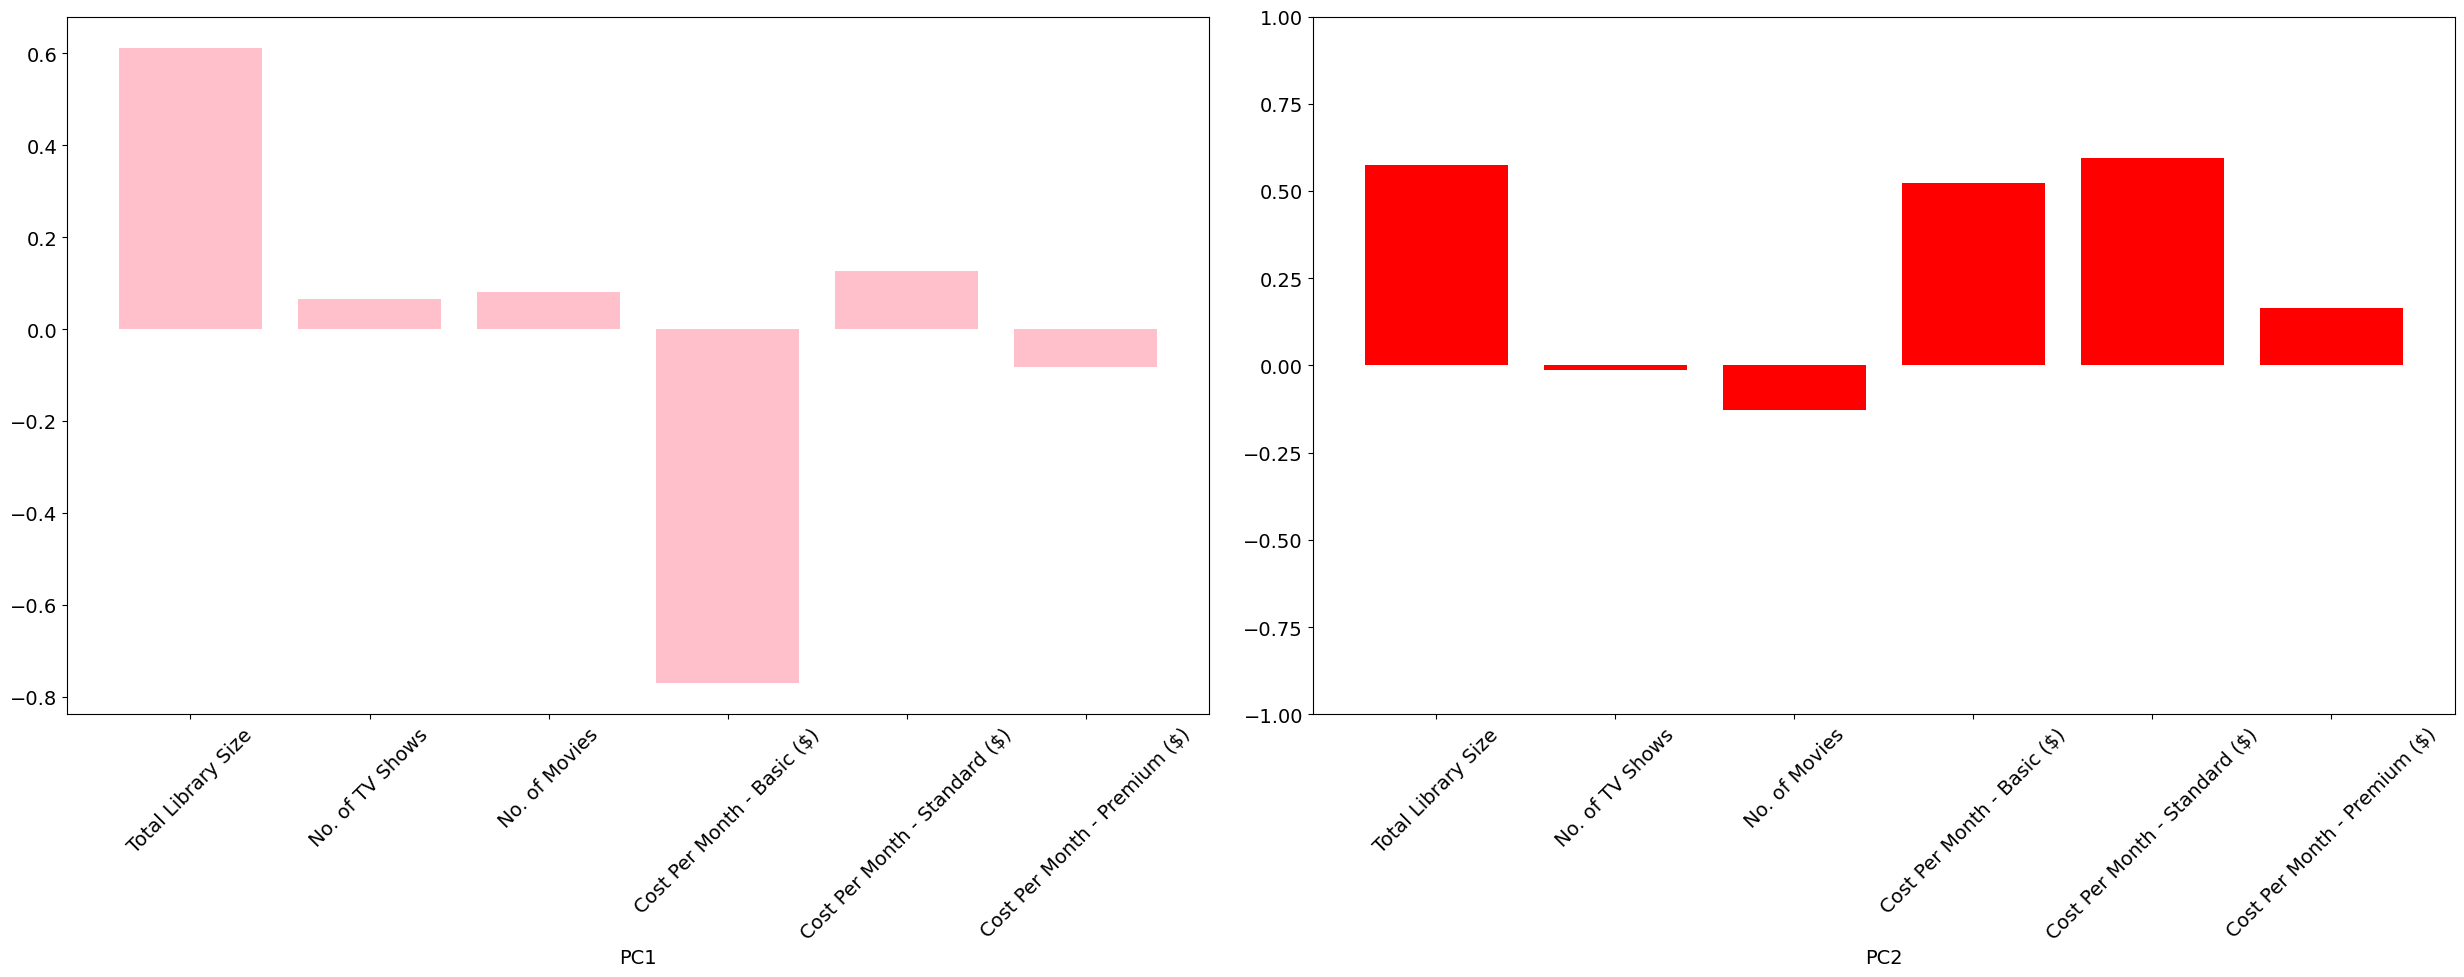

In [81]:
x_labels = list_of_columns[1:]

fig, ax = plt.subplots(1,2, figsize = (25,10))

ax[0].bar(range(6), zredukowana_macierz_trans['PC1'], align = 'center', color='pink')
ax[1].bar(range(6), zredukowana_macierz_trans['PC2'], align = 'center', color='red')

ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC2')

ax[0].set_xticks(range(6))
ax[1].set_xticks(range(6))

ax[0].set_xticklabels(x_labels, rotation = 45)
ax[1].set_xticklabels(x_labels, rotation = 45)

plt.ylim([-1,1])
plt.tight_layout()
plt.show()

In [82]:
for i in values:
    print(f'variance explained {i*100/6}%')

variance explained 40.45870997900807%
variance explained 31.85095005353529%
variance explained 13.283225221719173%
variance explained 6.661920667886392%
variance explained 5.766775670077213%
variance explained 1.9784184077739038%


In [83]:
vec = pd.DataFrame(vectors[:2])
Pt = vec.transpose()


index = pd.Index(df_transformed.columns.array[1:])
Pt = Pt.set_axis(['PC1', 'PC2'], axis=1)
Pt = Pt.set_index(index)
Pt

,PC1,PC2
Total Library Size,0.611454,0.575613
No. of TV Shows,0.065006,-0.014303
No. of Movies,0.081462,-0.126340
Cost Per Month - Basic ($),-0.769817,0.522689
Cost Per Month - Standard ($),0.126565,0.593280
Cost Per Month - Premium ($),-0.081396,0.165285


In [84]:
def column_chart(df, column):
    negative = []
    positive = []

    for element in df[column]:
        if element > 0:
            positive.append(element)
        else:
            negative.append(element)

    print(positive)
    print(negative)
    
    x = range(7)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.bar(x, negative, width=1, color='r')
    ax.bar(x, positive, width=1, color='b')

In [85]:
Country = df_transformed['Country']

In [86]:
macierz_T = np.dot(df_transformed.iloc[: , 1:],Pt) 

In [87]:
T_matrix = pd.DataFrame(macierz_T)
T_matrix = T_matrix.set_axis([Country])
T_matrix = T_matrix.set_axis(['PC1', 'PC2'], axis=1)
T_matrix

,PC1,PC2
Country,,
Argentina,304.004003,-270.682170
Australia,396.047217,-337.557363
Austria,361.452540,-307.769353
Belgium,313.378379,-269.543124
Bolivia,318.711772,-298.907456
...,...,...
Turkey,296.992576,-286.912013
Ukraine,346.821292,-333.755925
United Kingdom,430.437908,-349.165615


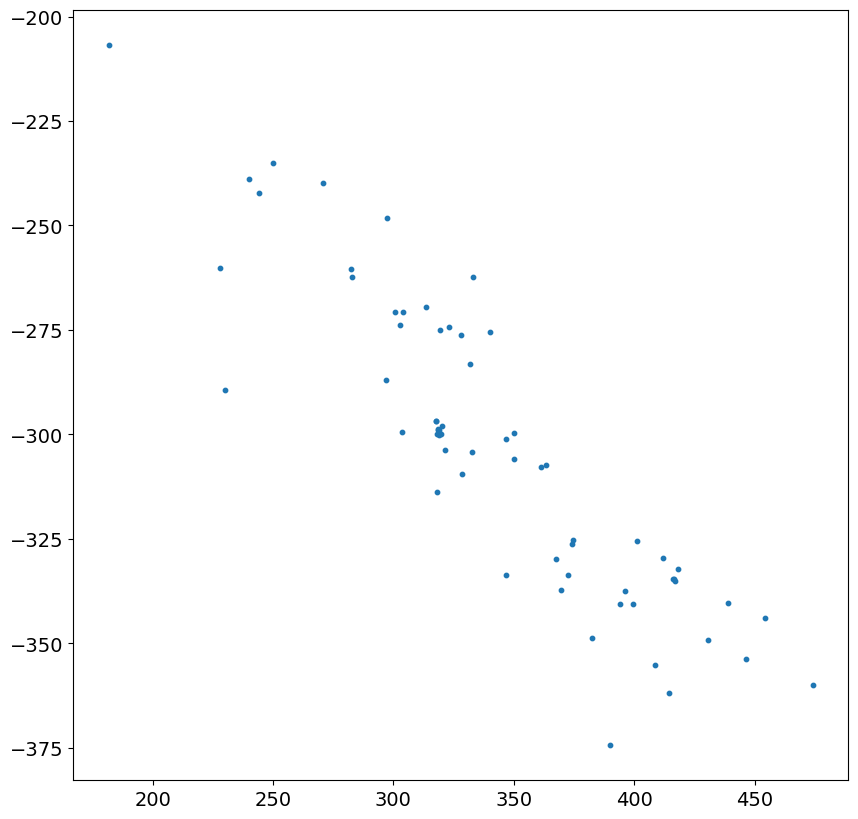

In [88]:
figure = plt.figure(figsize = (10,10))
plt.scatter(T_matrix['PC1'],T_matrix['PC2'], s = 10)
plt.show()

In [89]:
figure = plt.figure(figsize = (10,10))
plt.scatter(T_matrix['PC1'],T_matrix['PC3'], s = 20)
plt.show()

KeyError: 'PC3'

<Figure size 1000x1000 with 0 Axes>

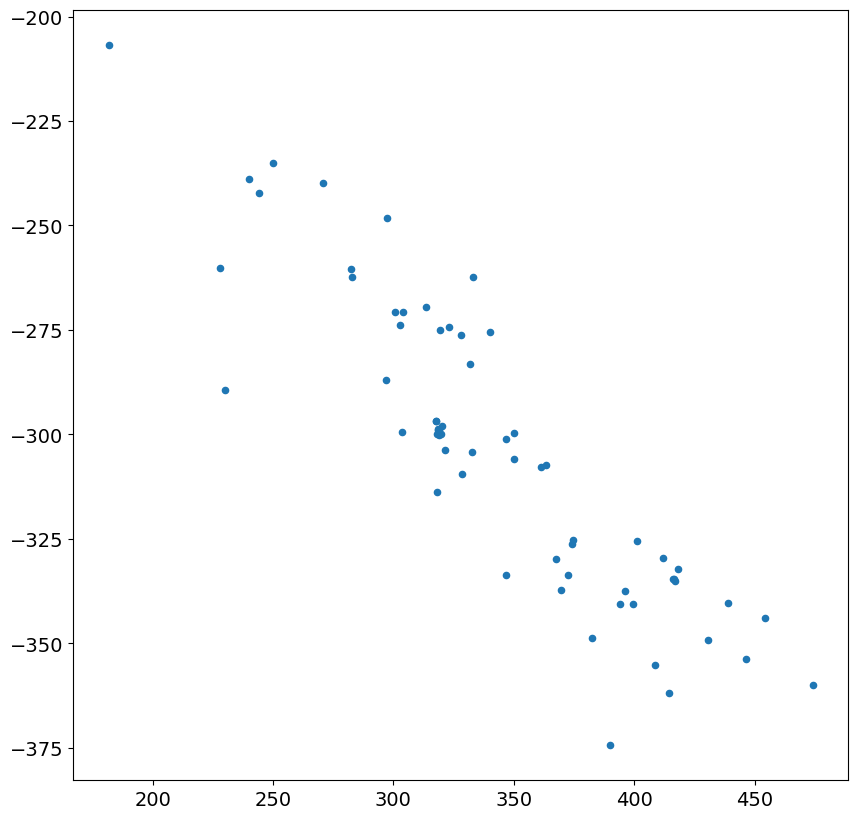

In [90]:
figure = plt.figure(figsize = (10,10))
plt.scatter(T_matrix['PC1'],T_matrix['PC2'], s = 20)
plt.show()

In [95]:
print(df_transformed.iloc[0:, 1:])

    Total Library Size  No. of TV Shows  No. of Movies  \
0           -52.805563      3149.153456    1597.942346   
1           -52.555230      4045.153456    2055.942346   
2           -52.635927      3774.153456    1852.942346   
3           -52.758375      3369.153456    1607.942346   
4           -52.758175      3150.153456    1827.942346   
..                 ...              ...            ...   
59          -52.831312      2925.153456    1700.942346   
60          -52.691335      3256.153456    2066.942346   
61          -52.472247      4546.153456    2083.942346   
62          -52.604854      3821.153456    1983.942346   
63          -52.758575      3149.153456    1826.942346   

    Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                    -0.575788                      10.465848   
1                     3.524212                      11.035848   
2                     3.524212                      10.465848   
3                     5.844212             

In [97]:
elements = []

for element in Pt['PC1']:
    elements.append(element)



    Total Library Size  No. of TV Shows  No. of Movies  \
0           -52.805563      3149.153456    1597.942346   
1           -52.555230      4045.153456    2055.942346   
2           -52.635927      3774.153456    1852.942346   
3           -52.758375      3369.153456    1607.942346   
4           -52.758175      3150.153456    1827.942346   
..                 ...              ...            ...   
59          -52.831312      2925.153456    1700.942346   
60          -52.691335      3256.153456    2066.942346   
61          -52.472247      4546.153456    2083.942346   
62          -52.604854      3821.153456    1983.942346   
63          -52.758575      3149.153456    1826.942346   

    Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                    -0.575788                      10.465848   
1                     3.524212                      11.035848   
2                     3.524212                      10.465848   
3                     5.844212             

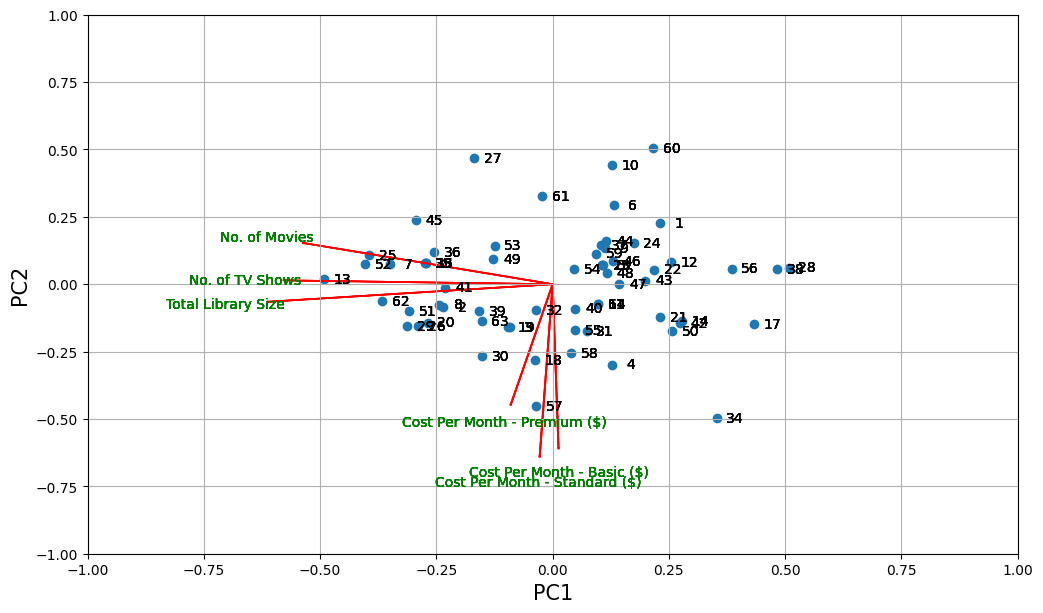

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = df_transformed.iloc[0:, 1:]
print(X)
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,)
    x_coord = xs*scalex
    y_coord = ys*scaley
    for i in range(n):
        for i in range(n):
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
            if labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
        
        for i in range(0,len(score)):
            plt.text(x_coord[i] + 0.040, y_coord[i], i+1,color = 'k',ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1), fontsize = 15)
plt.ylabel("PC{}".format(2), fontsize = 15)
plt.grid()
plt.rcParams.update({'font.size': 10})
#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),('Total Library Size','No. of TV Shows', 'No. of Movies', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'))
plt.show()